In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

In [235]:
data = pd.read_csv('df_normalized.csv')
data

,Age,Primary_streaming_service,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Foreign_languages,Frequency_Classical,...,Anxiety,Depression,Insomnia,OCD,Music_effects,Date,Time,Year,Month,Day
0,0.189873,Apple Music,0.083333,False,False,False,EDM,False,True,Never,...,10,3,1,4,Improve,2022-08-28,23:26:58,2022,8,28
1,0.075949,Other streaming service,0.166667,True,False,False,EDM,True,True,Sometimes,...,4,7,1,3,Improve,2022-09-13,1:55:43,2022,9,13
2,0.151899,Spotify,0.416667,False,True,True,EDM,False,True,Sometimes,...,4,7,7,3,Improve,2022-08-28,17:15:18,2022,8,28
3,0.202532,Spotify,0.250000,True,False,False,EDM,False,True,Never,...,10,10,8,2,No effect,2022-08-30,5:16:13,2022,8,30
4,0.101266,I do not use a streaming service.,0.166667,True,True,False,EDM,False,True,Very frequently,...,8,7,10,6,Improve,2022-09-02,9:25:05,2022,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0.240506,YouTube Music,0.083333,True,False,False,Hip hop,True,True,Sometimes,...,2,2,2,5,Improve,2022-11-09,1:55:20,2022,11,9
732,0.088608,Spotify,0.166667,False,True,False,Classical,True,True,Very frequently,...,7,9,2,8,Worsen,2022-08-28,23:23:50,2022,8,28
733,0.088608,Spotify,0.125000,True,False,False,Classical,True,True,Very frequently,...,6,6,8,2,Improve,2022-08-28,11:58:48,2022,8,28
734,0.037975,Spotify,0.041667,True,False,False,Video game music,True,False,Rarely,...,10,10,8,4,Worsen,2022-10-22,15:20:29,2022,10,22


In [236]:
df = data.copy()
df.columns

Index(['Age', 'Primary_streaming_service', 'Hours_per_day', 'While_working',
       'Instrumentalist', 'Composer', 'Fav_genre', 'Exploratory',
       'Foreign_languages', 'Frequency_Classical', 'Frequency_Country',
       'Frequency_EDM', 'Frequency_Folk', 'Frequency_Gospel',
       'Frequency_Hip_hop', 'Frequency_Jazz', 'Frequency_K_pop',
       'Frequency_Latin', 'Frequency_Lofi', 'Frequency_Metal', 'Frequency_Pop',
       'Frequency_R_B', 'Frequency_Rap', 'Frequency_Rock',
       'Frequency_Video_game_music', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music_effects', 'Date', 'Time', 'Year', 'Month', 'Day'],
      dtype='object')

In [237]:
streaming_service_user_counts = df['Primary_streaming_service'].value_counts()

fig = px.pie(values= streaming_service_user_counts.values, names= streaming_service_user_counts.index,
             title='Primary Streaming service Distribution of Total Listeners')

fig.show()

The graphic illustrates the distribution of total listeners across different primary streaming services. Each slice represents a streaming service and the size of each silce correpsonds to proportions of users using that service. By oberserving pie chart you can quickly identifiy which streaming service has the largest userbase and how it compares to others in terms of user count. Sumarize: (It reveals that Spotify holds the majority share with 62.2%, followed by YouTube at 12.8%, and Apple at 6.93%. While Pandora accounts for a smaller percentage at 1.49%, it still represents a portion of the user base. Additionally, there's a noteworthy percentage (9.65%) of users who do not use any streaming service.)

Breakdown is important for our analysis because it helps understand the user preferences, which can influence music listening habits.

In [238]:
avg_hours_per_genre = df.groupby('Fav_genre')['Hours_per_day'].sum().reset_index()

fig = px.bar(avg_hours_per_genre, x='Fav_genre', y='Hours_per_day',
             title='Average Listening Hours per Day by Favorite Genre')
fig.show()

By oberserving this histogram we can identify which genre have the highest and lowest listeing hours per day. it helps us understand the prefernces and listing habits of users across different favorite genres.

In [239]:
daily_genre_hours = df.groupby(['Date', 'Fav_genre'])['Hours_per_day'].sum().reset_index()

fig = px.histogram(daily_genre_hours, x='Fav_genre', y='Hours_per_day', color='Fav_genre', title='Daily Listening Hours by Genre')
fig.update_layout(xaxis_title='Favorite Genre', yaxis_title='Listening Hours', legend_title='Favorite Genre')
fig.show()

In [240]:
avg_listening_hours_per_language = df.groupby('Foreign_languages')['Hours_per_day'].mean().reset_index()

fig = px.bar(avg_listening_hours_per_language, x='Foreign_languages', y='Hours_per_day',
             title='Average Listening Hours per Day by Foreign Language',
             color='Foreign_languages')

fig.show()

In [241]:
genre_counts_over_time = df.groupby(['Date', 'Fav_genre']).size().unstack(fill_value=0)

fig = px.line(genre_counts_over_time, x=genre_counts_over_time.index, y=genre_counts_over_time.columns,
              title='Changes in Preferred Genres Over Time', labels={'Date': 'Date', 'value': 'Frequency', 'variable': 'Favorite Genre'})
fig.update_layout(xaxis_title='Date', yaxis_title='Frequency')
fig.show()

In [242]:
genre_counts_over_time = df.groupby(['Time', 'Fav_genre']).size().unstack(fill_value=0)

fig = px.line(genre_counts_over_time, x=genre_counts_over_time.index, y=genre_counts_over_time.columns,
              title='Changes in Preferred Genres during Day', labels={'Time': 'Time', 'value': 'Frequency', 'variable': 'Favorite Genre'})
fig.update_layout(xaxis_title='Date', yaxis_title='Frequency')
fig.show()

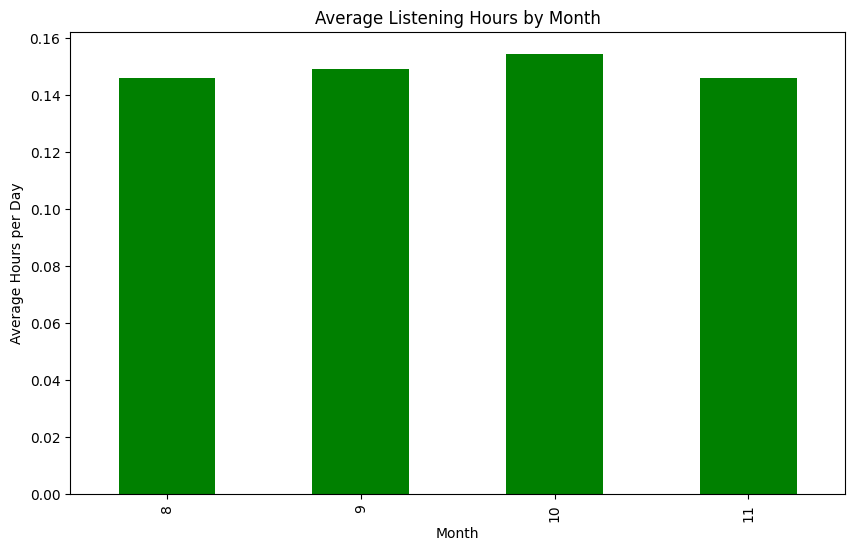

In [243]:
seasonal= df.groupby('Month')['Hours_per_day'].mean()

plt.figure(figsize=(10, 6))
seasonal.plot(kind='bar', color='green')
plt.title('Average Listening Hours by Month')
plt.xlabel('Month')
plt.ylabel('Average Hours per Day')
plt.show()

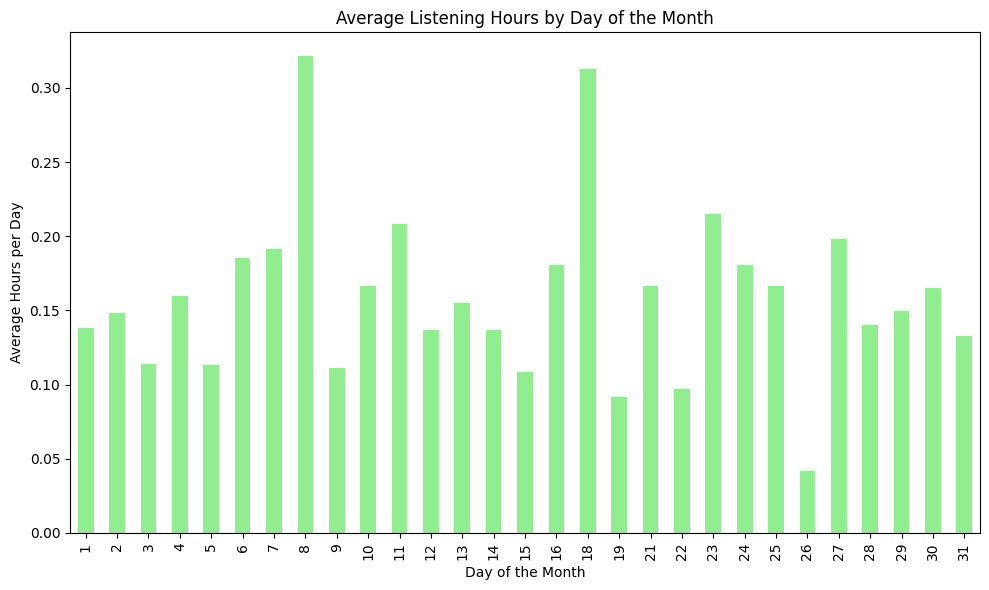

In [244]:
daily_data = df.groupby('Day')['Hours_per_day'].mean()

plt.figure(figsize=(10, 6))
daily_data.plot(kind='bar', color='lightgreen')
plt.title('Average Listening Hours by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Hours per Day')
plt.tight_layout()
plt.show()

In [245]:
service_Month = df.groupby(['Primary_streaming_service', 'Day']).size().reset_index(name='Count')

fig = px.bar(service_Month, x='Primary_streaming_service', y=['Day'],
             title='Comparison of Mental Health Indicators Between Favorite Genres')
fig.update_layout(xaxis_title='Primary_streaming_service', yaxis_title='Month', barmode='group')
fig.show()

In [246]:
fig = px.scatter(df, x='Age', y='Hours_per_day', title='Correlation between Age and Hours of Listening')
fig.show()

In [247]:
Age_hours = df[['Age', 'Hours_per_day']]

correlation_matrix = Age_hours.corr()

print(correlation_matrix)

                    Age  Hours_per_day
Age            1.000000      -0.045828
Hours_per_day -0.045828       1.000000


In [248]:
correlation_matrix = df[['Hours_per_day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']].corr()
print(correlation_matrix)

               Hours_per_day   Anxiety  Depression  Insomnia       OCD
Hours_per_day       1.000000  0.048929    0.111352  0.143050  0.119609
Anxiety             0.048929  1.000000    0.519470  0.292346  0.347932
Depression          0.111352  0.519470    1.000000  0.378953  0.196397
Insomnia            0.143050  0.292346    0.378953  1.000000  0.226085
OCD                 0.119609  0.347932    0.196397  0.226085  1.000000


In [249]:
hours_groups = df.groupby('Hours_per_day')[['Anxiety', 'Insomnia', 'OCD', 'Depression']].mean().reset_index()

fig = px.bar(hours_groups, x='Hours_per_day', y=['Anxiety', 'Insomnia', 'OCD', 'Depression'],
             title='Comparison of Mental Health Indicators Between Hours of listening per day')
fig.update_layout(xaxis_title='Hours_per_day', yaxis_title='Mean Health Indicator Value', barmode='group')
fig.show()

In [250]:
genre_groups = df.groupby('Fav_genre')[['Anxiety', 'Insomnia', 'OCD', 'Depression']].mean().reset_index()

fig = px.bar(genre_groups, x='Fav_genre', y=['Anxiety', 'Insomnia', 'OCD', 'Depression'],
             title='Comparison of Mental Health Indicators Across Favorite Genres')
fig.update_layout(xaxis_title='Favorite Genre', yaxis_title='Mean Health Indicator Value', barmode='group')
fig.show()

In [251]:
df.head()

,Age,Primary_streaming_service,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Foreign_languages,Frequency_Classical,...,Anxiety,Depression,Insomnia,OCD,Music_effects,Date,Time,Year,Month,Day
0,0.189873,Apple Music,0.083333,False,False,False,EDM,False,True,Never,...,10,3,1,4,Improve,2022-08-28,23:26:58,2022,8,28
1,0.075949,Other streaming service,0.166667,True,False,False,EDM,True,True,Sometimes,...,4,7,1,3,Improve,2022-09-13,1:55:43,2022,9,13
2,0.151899,Spotify,0.416667,False,True,True,EDM,False,True,Sometimes,...,4,7,7,3,Improve,2022-08-28,17:15:18,2022,8,28
3,0.202532,Spotify,0.250000,True,False,False,EDM,False,True,Never,...,10,10,8,2,No effect,2022-08-30,5:16:13,2022,8,30
4,0.101266,I do not use a streaming service.,0.166667,True,True,False,EDM,False,True,Very frequently,...,8,7,10,6,Improve,2022-09-02,9:25:05,2022,9,2


In [252]:
Service_groups = df.groupby('Primary_streaming_service')[['Anxiety', 'Insomnia', 'OCD', 'Depression']].mean().reset_index()

fig = px.bar(Service_groups, x='Primary_streaming_service', y=['Anxiety', 'Insomnia', 'OCD', 'Depression'],
             title='Comparison of Mental Health Indicators Between Primary Streaming Services')
fig.update_layout(xaxis_title='Primary Streaming Service', yaxis_title='Mean Health Indicator Value', barmode='group')
fig.show()

In [253]:
Age_groups = df.groupby('Age')[['Anxiety', 'Insomnia', 'OCD', 'Depression']].mean().reset_index()

fig = px.bar(Age_groups, x='Age', y=['Anxiety', 'Insomnia', 'OCD', 'Depression'],
             title='Comparison of Mental Health Indicators Between Ages')
fig.update_layout(xaxis_title='Age', yaxis_title='Mean Health Indicator Value', barmode='group')
fig.show()

In [254]:
num_users_with_anxiety = df['Anxiety'].sum()
total_users = len(df)
percentage_anxiety = (num_users_with_anxiety / total_users) * 100
print(f"Percentage of Users with Anxiety: {percentage_anxiety}%")

Percentage of Users with Anxiety: 583.6956521739131%


In [255]:
age_ranges = [(0, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, float('inf'))]
mental_illness_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

genres = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip_hop', 'Jazz', 'K_pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R_B', 'Rap', 'Rock', 'Video_game_music']
streaming_services = ['Apple Music', 'Other streaming service', 'Spotify', 'I do not use a streaming service.']

grouped_data = df.groupby(['Age', 'Primary_streaming_service', 'Fav_genre', 'Hours_per_day'])[mental_illness_columns].sum().reset_index()

for age_range in age_ranges:
    age_filter = (grouped_data['Age'] >= age_range[0]) & (grouped_data['Age'] <= age_range[1])
    age_group = grouped_data[age_filter]

    for illness_column in mental_illness_columns:
        illness_percentage = (age_group[illness_column].sum() / len(age_group)) * 100

        print(f"Age Range: {age_range}, Mental Illness: {illness_column}, Percentage: {illness_percentage:.2f}%")

Age Range: (0, 20), Mental Illness: Anxiety, Percentage: 667.08%
Age Range: (0, 20), Mental Illness: Depression, Percentage: 547.98%
Age Range: (0, 20), Mental Illness: Insomnia, Percentage: 427.17%
Age Range: (0, 20), Mental Illness: OCD, Percentage: 301.24%
Age Range: (21, 30), Mental Illness: Anxiety, Percentage: nan%
Age Range: (21, 30), Mental Illness: Depression, Percentage: nan%
Age Range: (21, 30), Mental Illness: Insomnia, Percentage: nan%
Age Range: (21, 30), Mental Illness: OCD, Percentage: nan%
Age Range: (31, 40), Mental Illness: Anxiety, Percentage: nan%
Age Range: (31, 40), Mental Illness: Depression, Percentage: nan%
Age Range: (31, 40), Mental Illness: Insomnia, Percentage: nan%
Age Range: (31, 40), Mental Illness: OCD, Percentage: nan%
Age Range: (41, 50), Mental Illness: Anxiety, Percentage: nan%
Age Range: (41, 50), Mental Illness: Depression, Percentage: nan%
Age Range: (41, 50), Mental Illness: Insomnia, Percentage: nan%
Age Range: (41, 50), Mental Illness: OCD, P

<ipython-input-255-0e53e64bdb96>:14: RuntimeWarning:

invalid value encountered in scalar divide



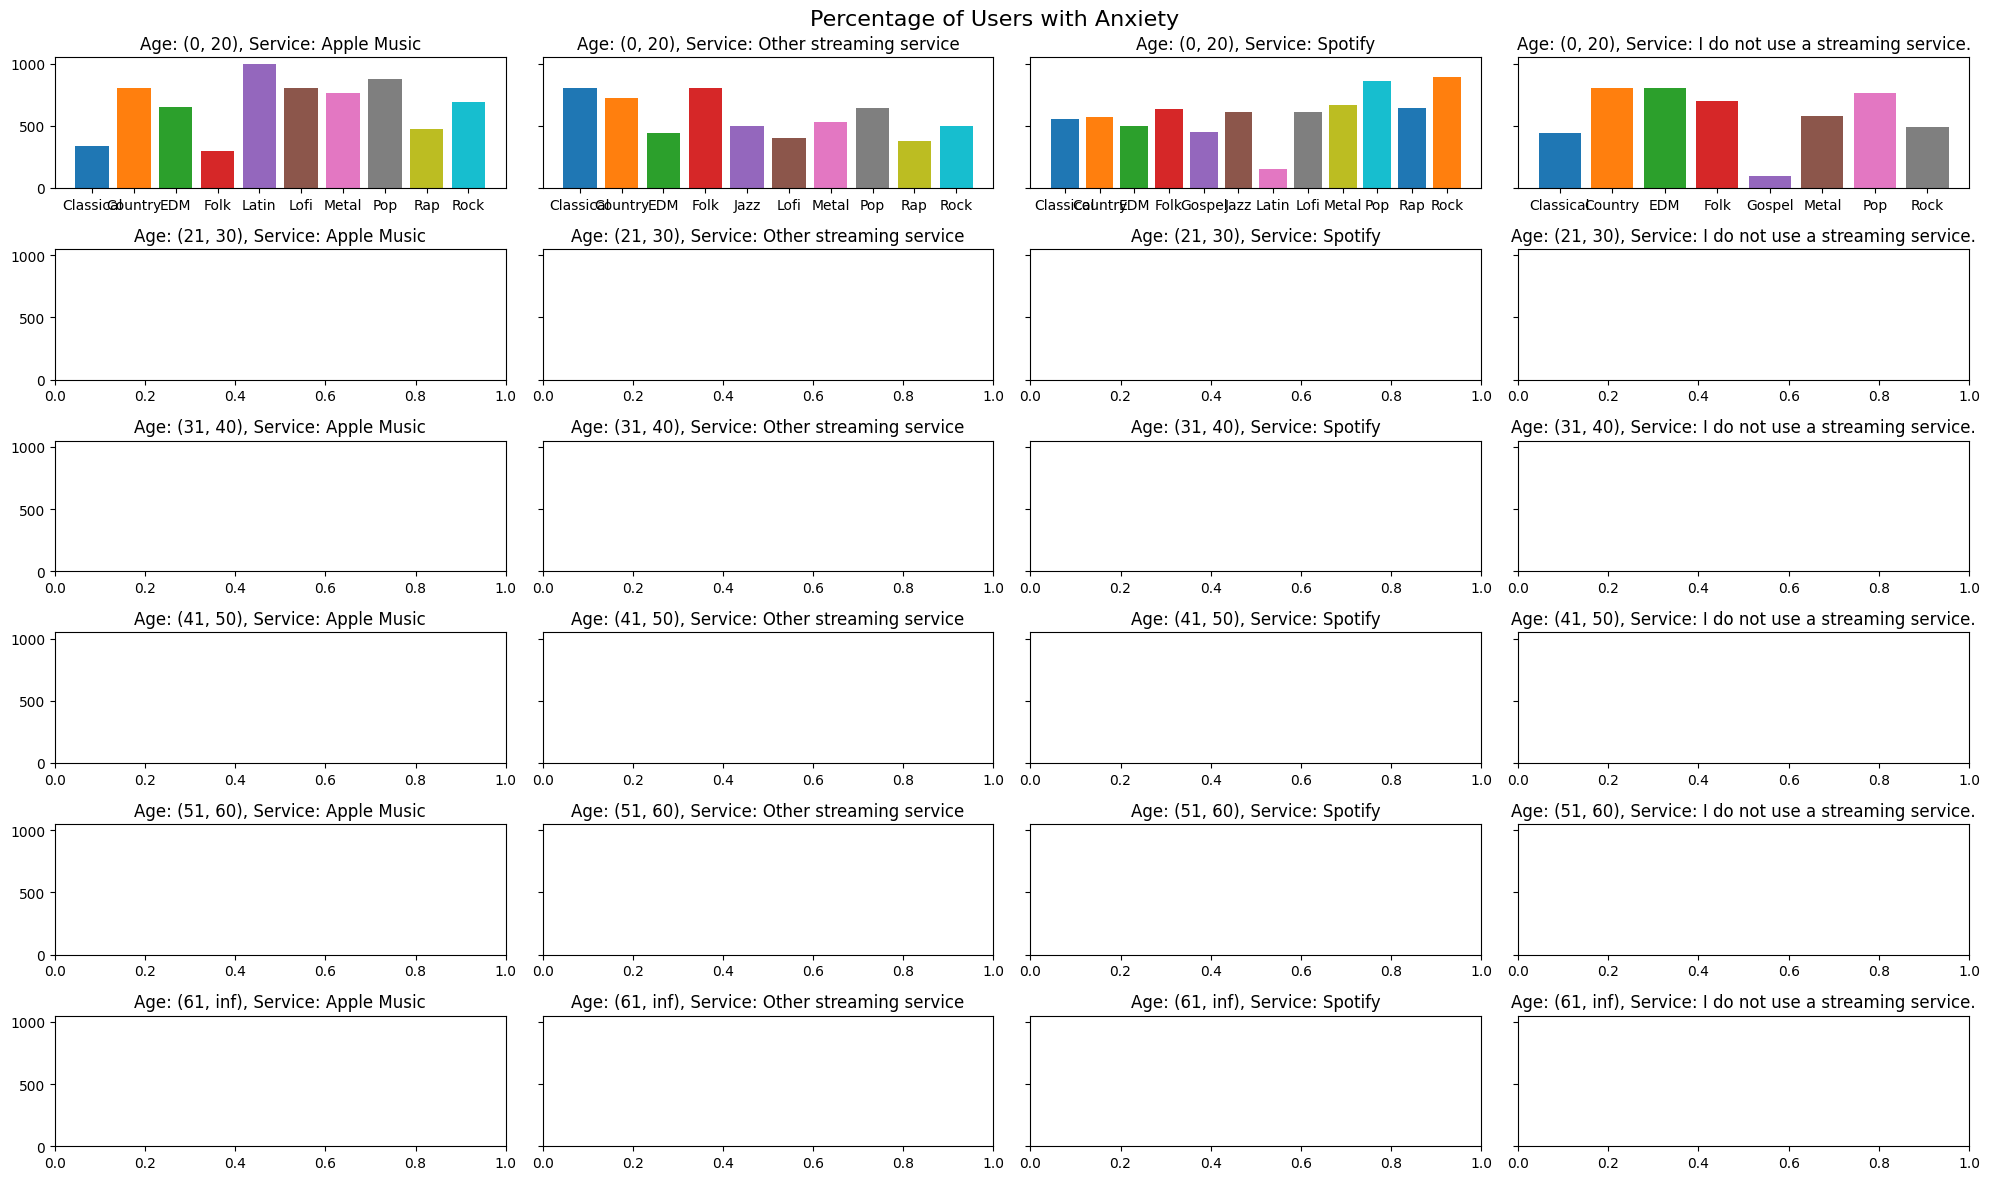

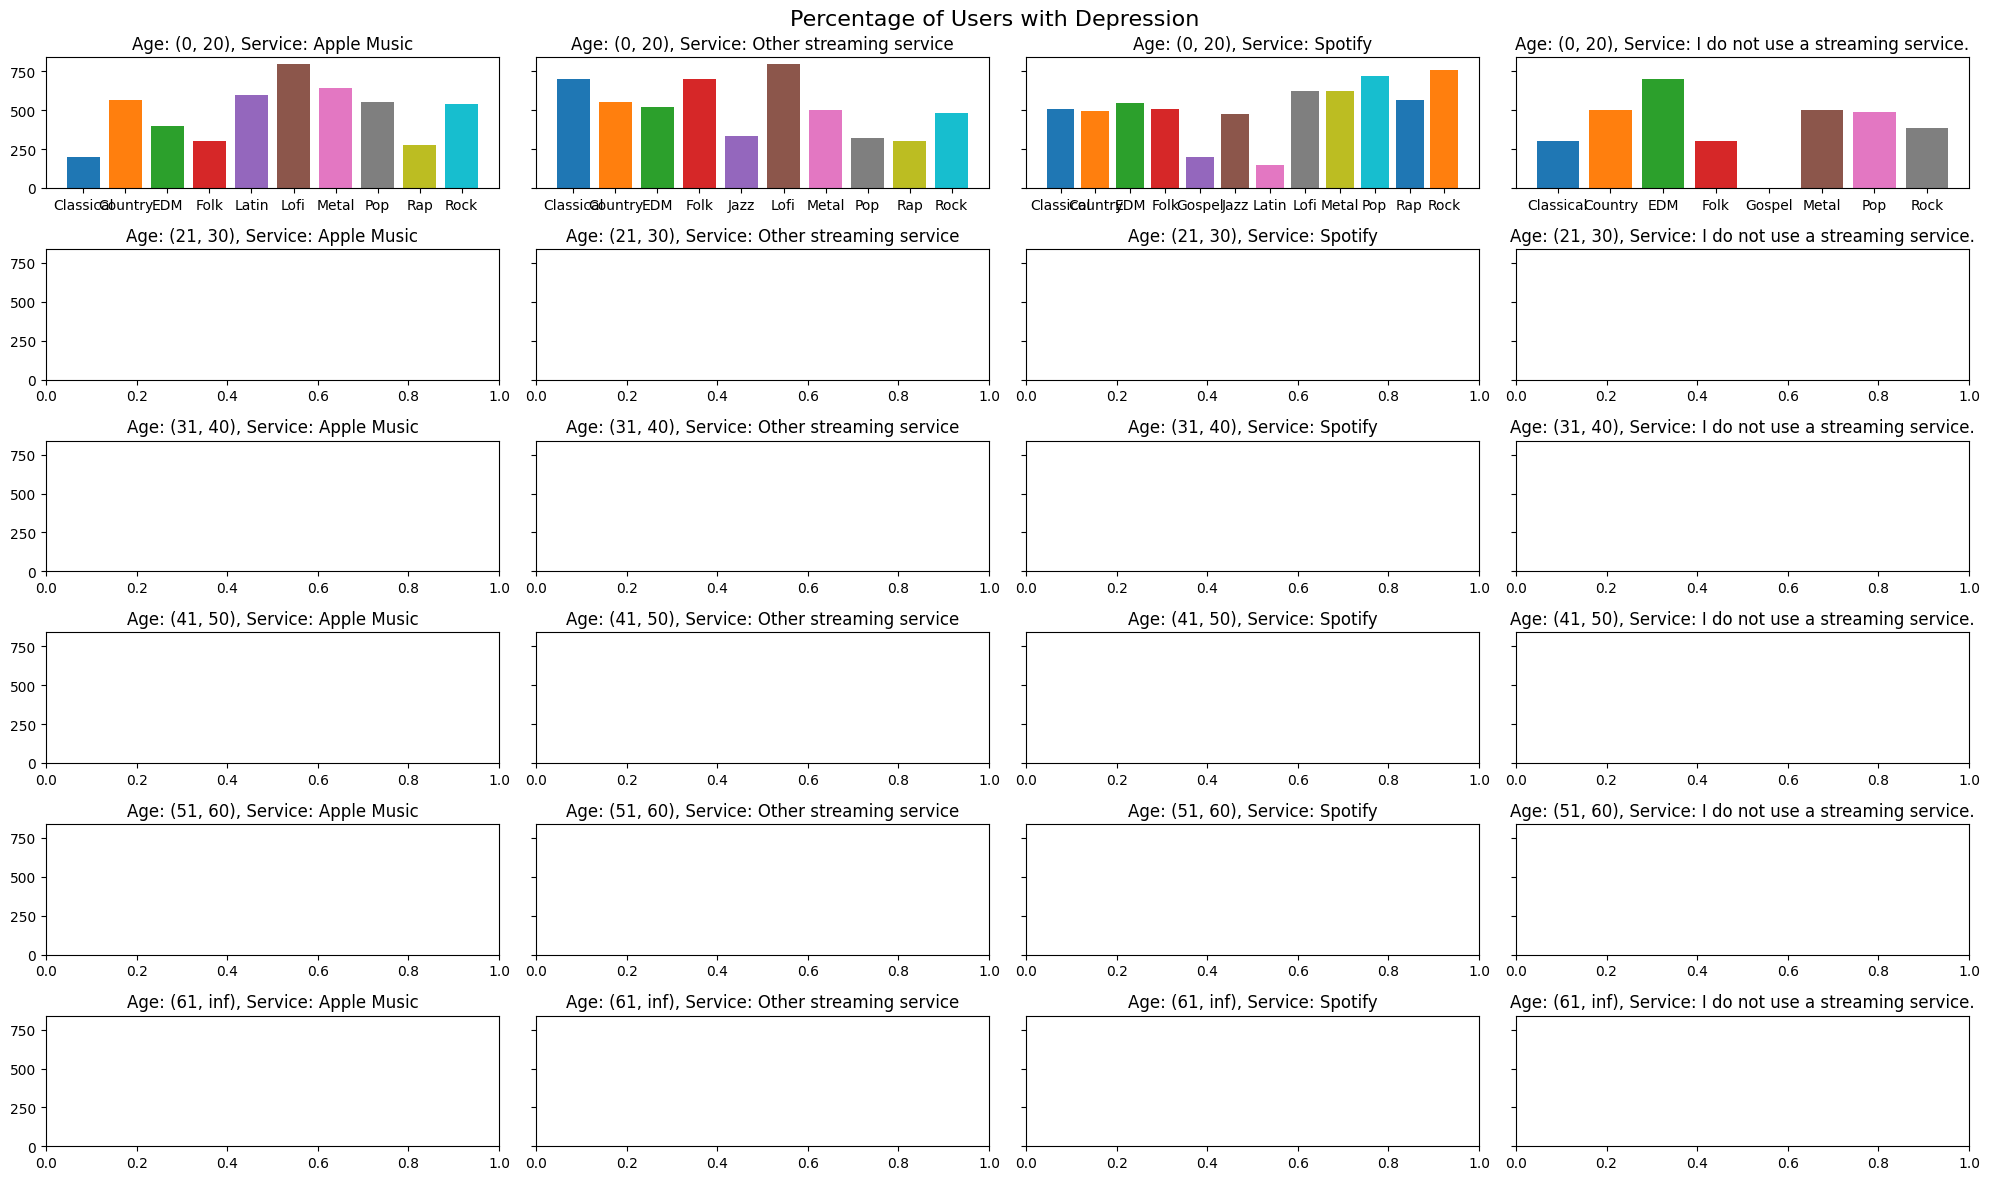

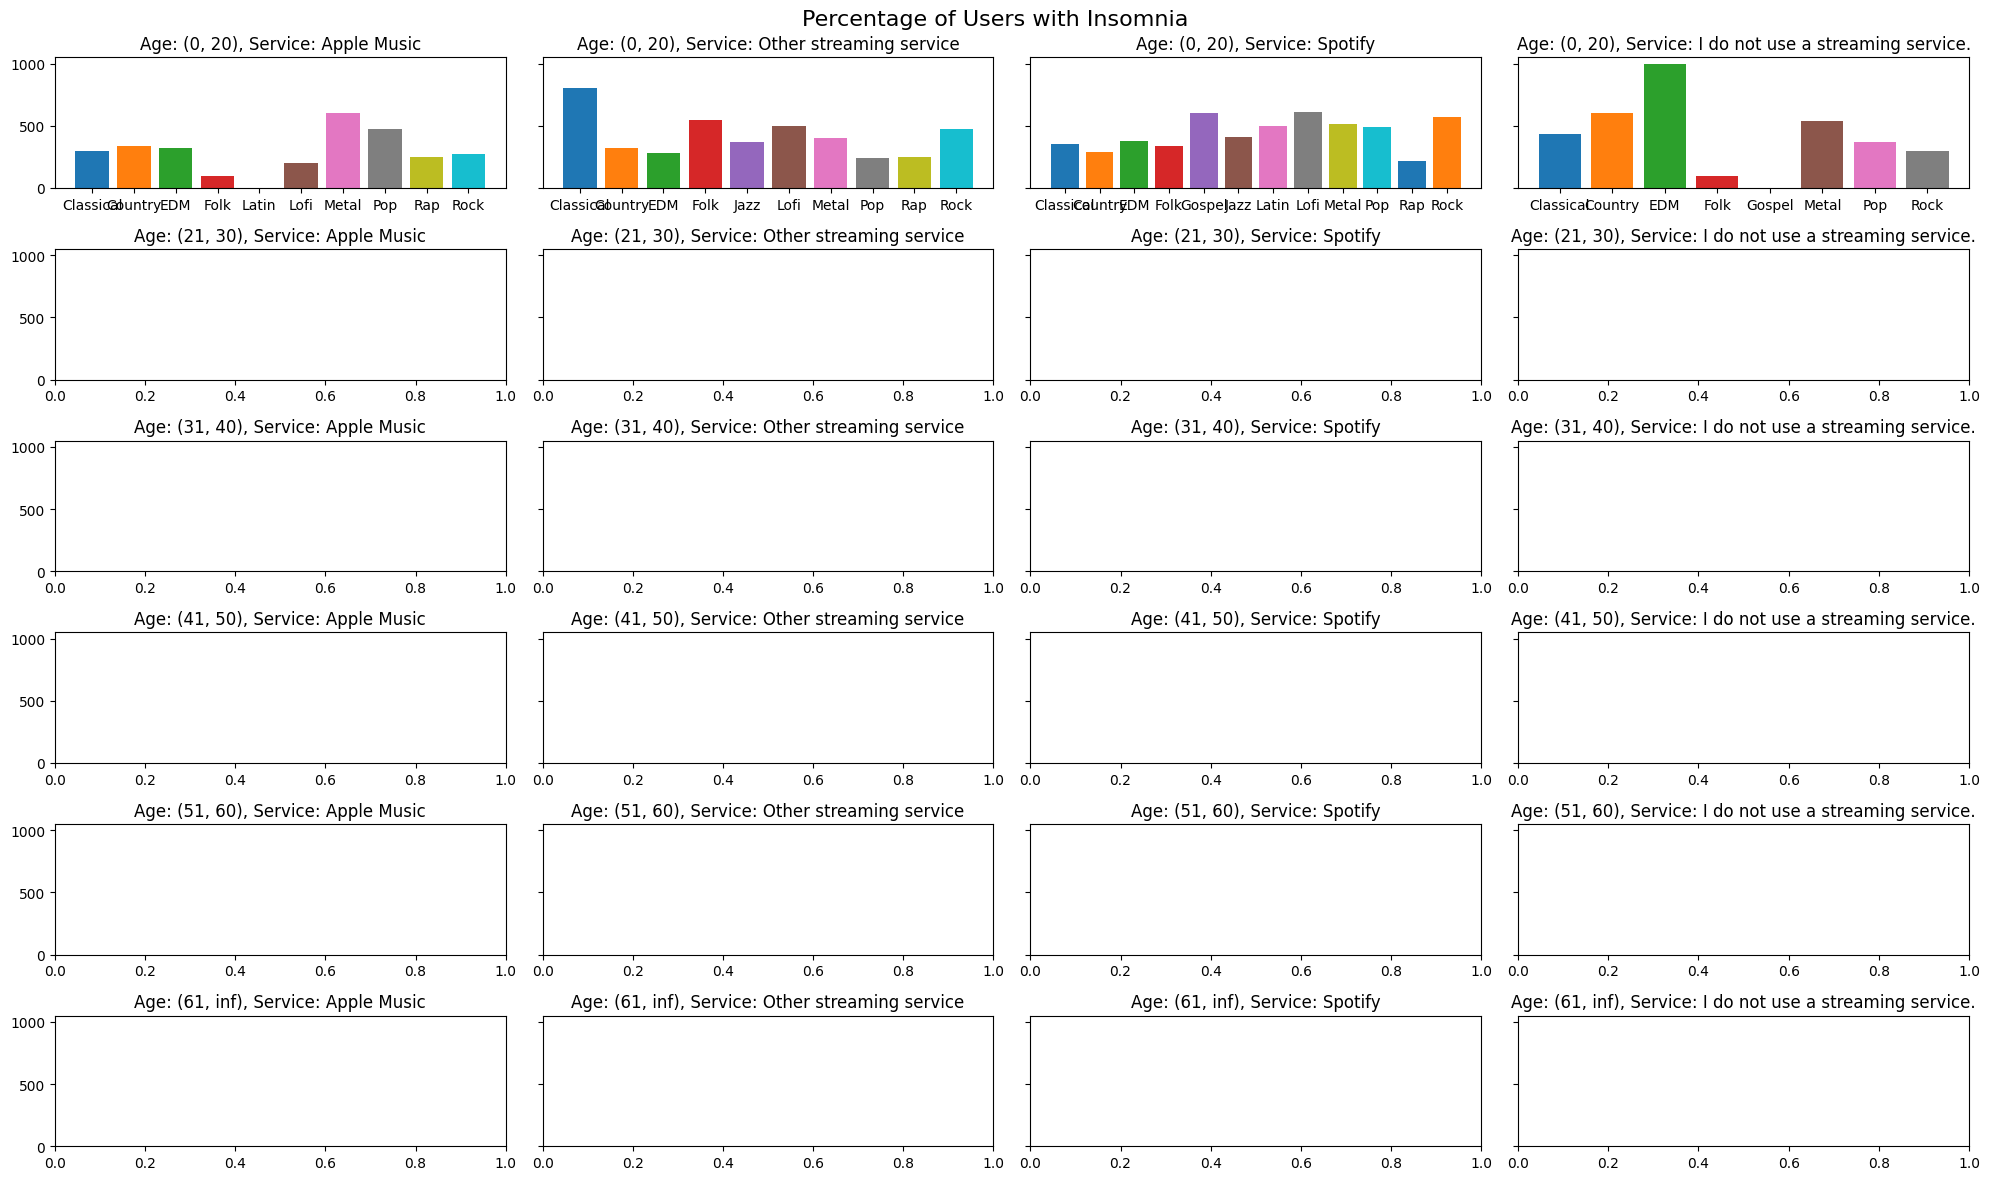

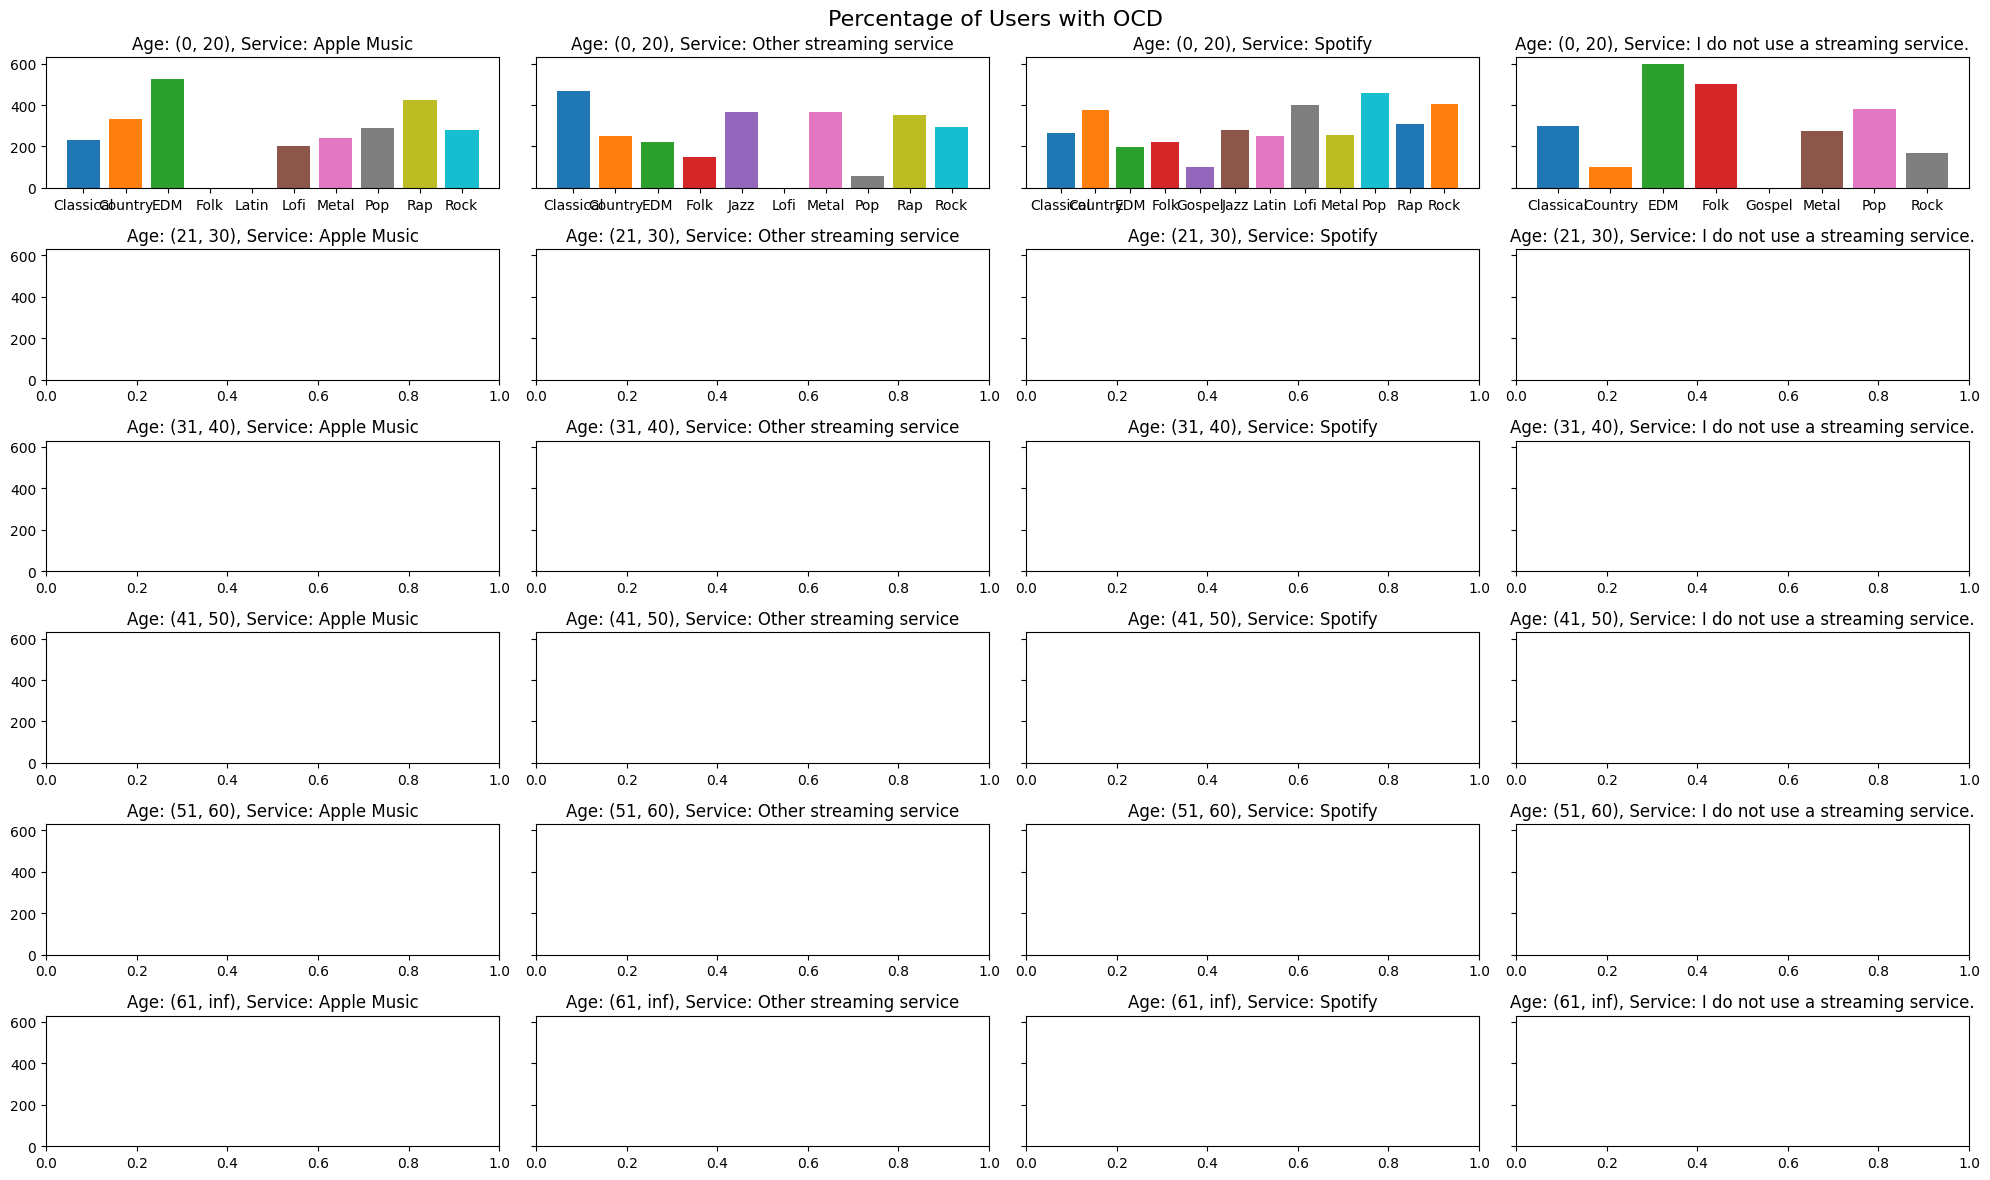

In [256]:
for illness_column in mental_illness_columns:
    fig, axs = plt.subplots(len(age_ranges), len(streaming_services), figsize=(20, 12), sharey=True)
    fig.suptitle(f'Percentage of Users with {illness_column}', fontsize=16)

    for i, age_range in enumerate(age_ranges):
        for j, streaming_service in enumerate(streaming_services):
            age_filter = (grouped_data['Age'] >= age_range[0]) & (grouped_data['Age'] <= age_range[1])
            service_filter = grouped_data['Primary_streaming_service'] == streaming_service
            filtered_data = grouped_data[age_filter & service_filter]

            ax = axs[i, j]
            ax.set_title(f'Age: {age_range}, Service: {streaming_service}')

            for genre in genres:
                genre_filter = filtered_data['Fav_genre'] == genre
                genre_data = filtered_data[genre_filter]

                if not genre_data.empty:
                    percentage = (genre_data[illness_column].sum() / len(genre_data)) * 100
                    ax.bar(genre, percentage)

    plt.tight_layout()
    plt.show()

In [257]:
def display_mental_illness_results(mental_illness, age_ranges, streaming_services, genres, grouped_data):
    print(f"{mental_illness}:")
    print("Highest in:")
    highest_percentage = 0
    highest_info = None
    for age_range in age_ranges:
        for service in streaming_services:
            for genre in genres:
                filtered_data = grouped_data[(grouped_data['Age'] >= age_range[0]) &
                                             (grouped_data['Age'] <= age_range[1]) &
                                             (grouped_data['Primary_streaming_service'] == service) &
                                             (grouped_data['Fav_genre'] == genre)]
                total_users = len(filtered_data)
                if total_users > 0:
                    percentage = (filtered_data[mental_illness].sum() / total_users) * 100
                    if percentage > highest_percentage:
                        highest_percentage = percentage
                        highest_info = f"Age {age_range}, {service}, {genre}"
    print(f"  {highest_info}, Percentage: {highest_percentage:.2f}%")

    lowest_percentage = 100  # Assuming the lowest percentage starts at 100%
    lowest_info = None
    for age_range in age_ranges:
        for service in streaming_services:
            for genre in genres:
                filtered_data = grouped_data[(grouped_data['Age'] >= age_range[0]) &
                                             (grouped_data['Age'] <= age_range[1]) &
                                             (grouped_data['Primary_streaming_service'] == service) &
                                             (grouped_data['Fav_genre'] == genre)]
                total_users = len(filtered_data)
                if total_users > 0:
                    percentage = (filtered_data[mental_illness].sum() / total_users) * 100
                    if percentage < lowest_percentage:
                        lowest_percentage = percentage
                        lowest_info = f"Age {age_range}, {service}, {genre}"
    print(f"Lowest in:")
    print(f"  {lowest_info}, Percentage: {lowest_percentage:.2f}%")

# Usage example
display_mental_illness_results('Anxiety', age_ranges, streaming_services, genres, grouped_data)

Anxiety:
Highest in:
  Age (0, 20), Apple Music, Latin, Percentage: 1000.00%
Lowest in:
  None, Percentage: 100.00%


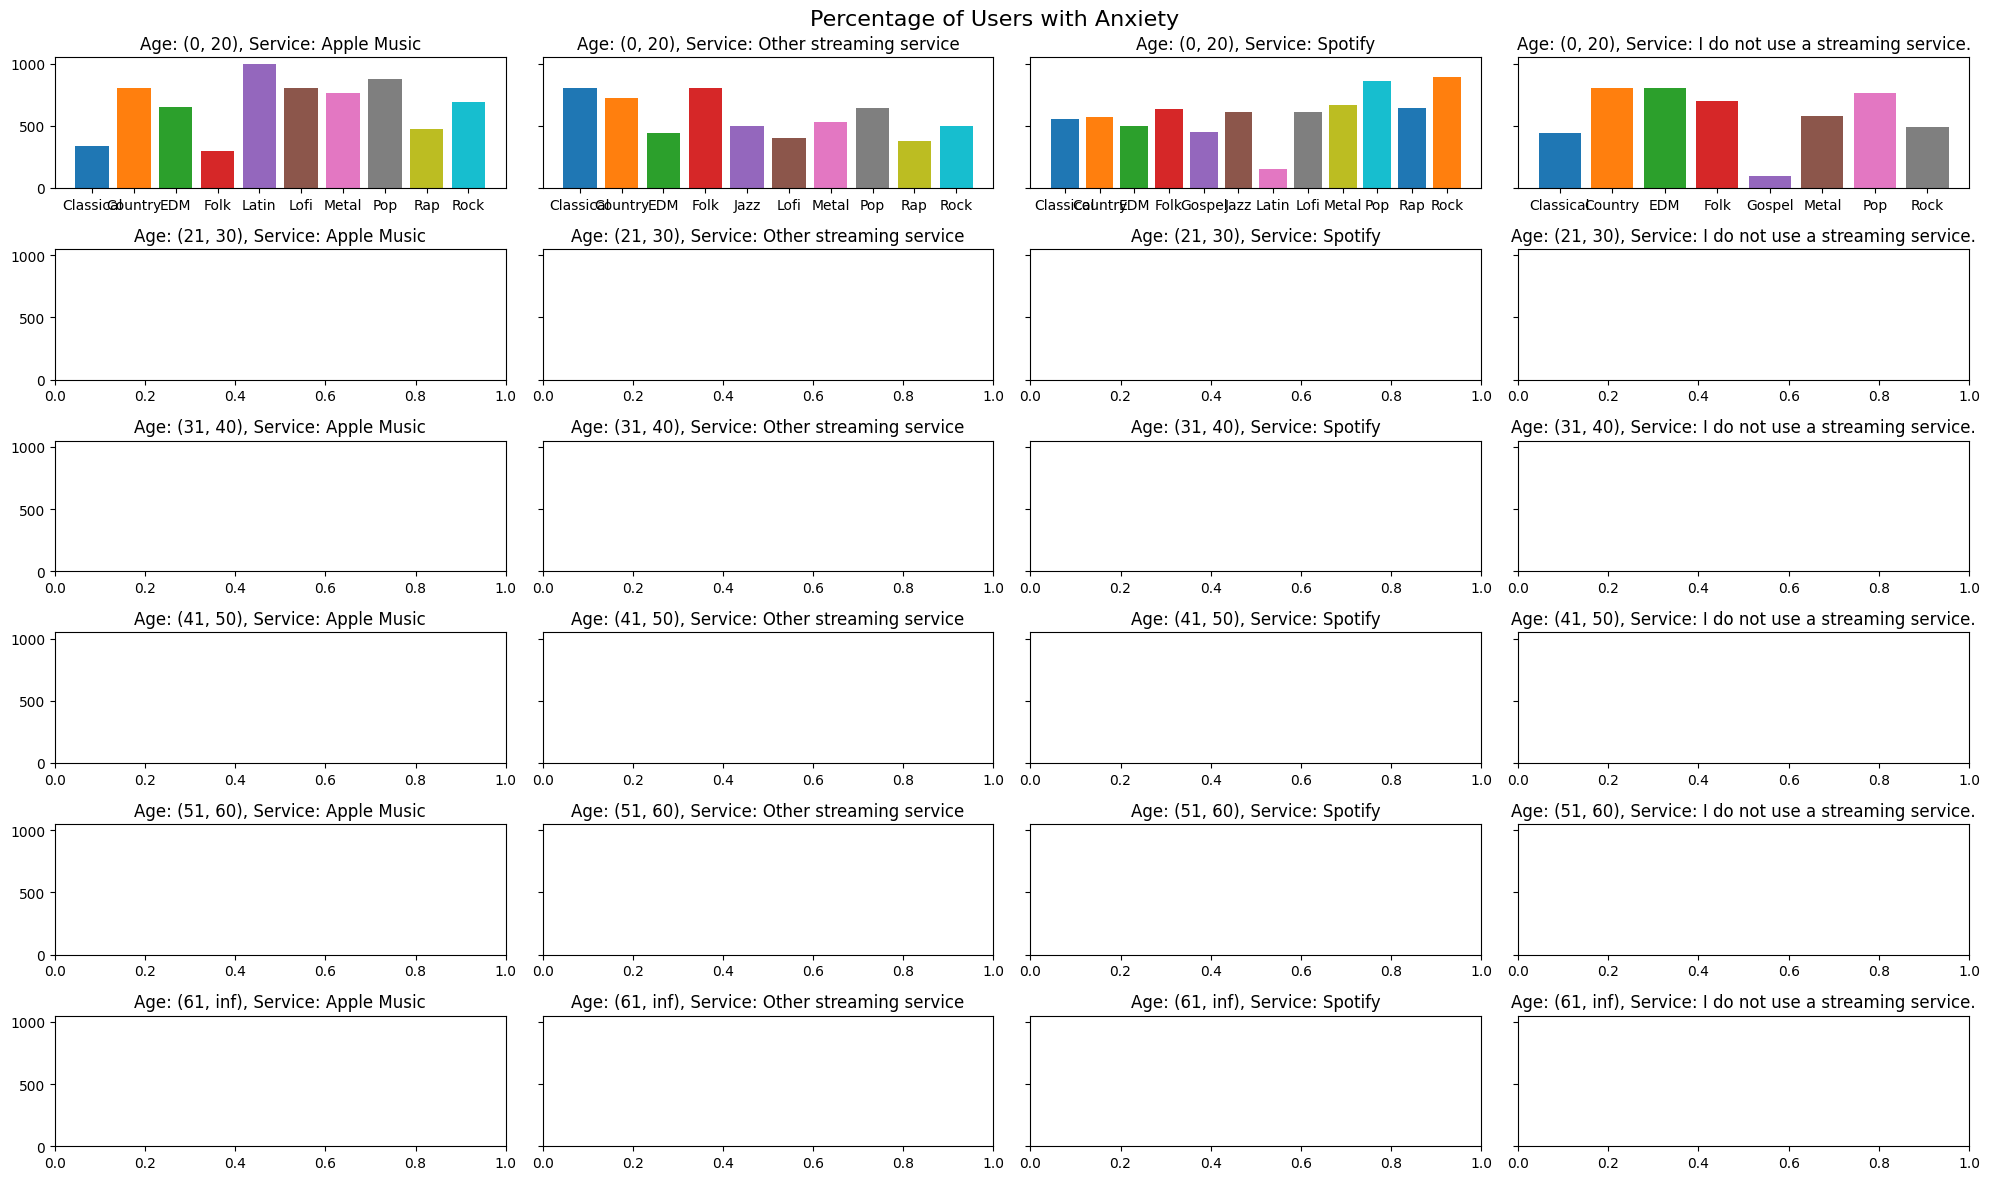

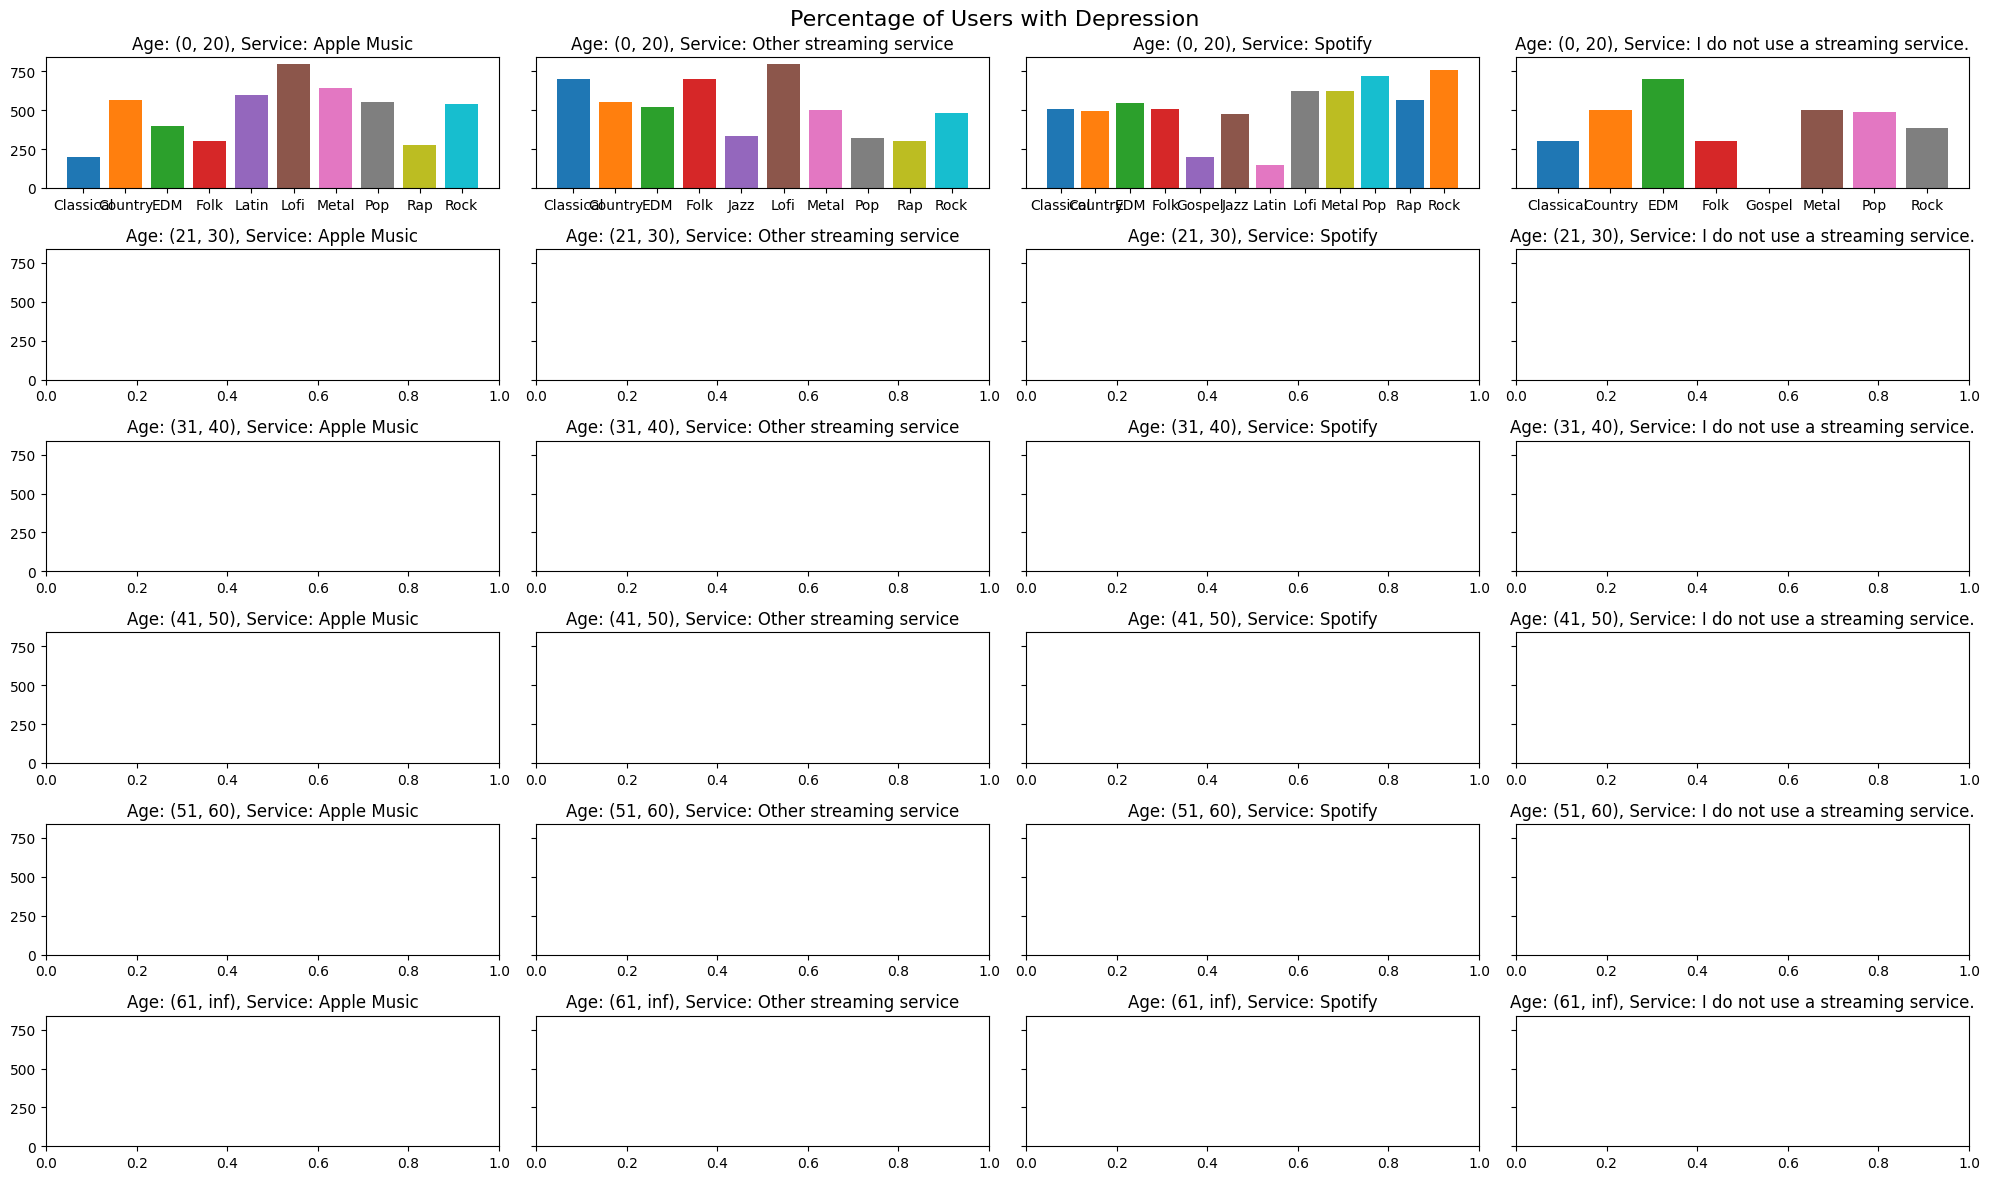

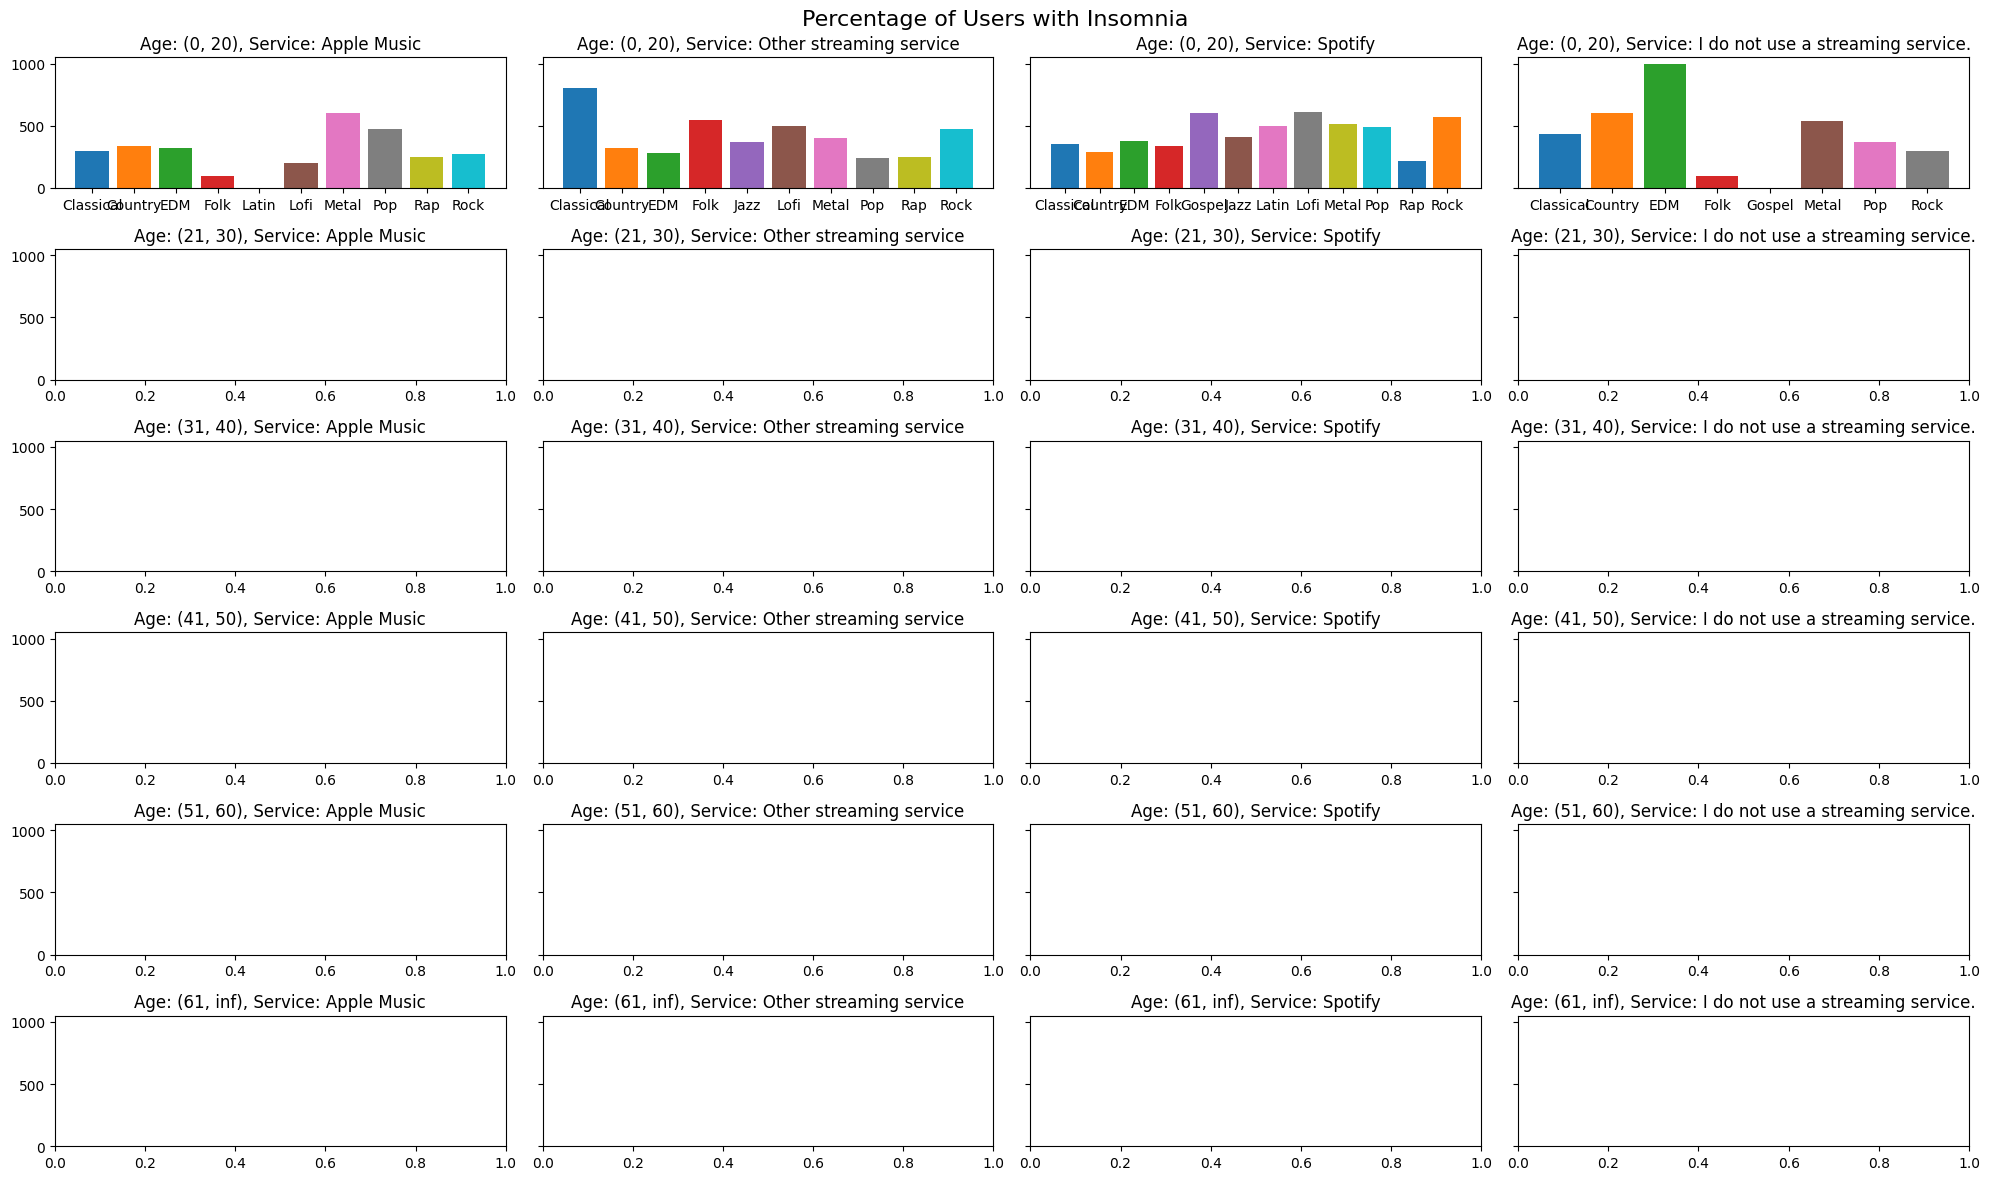

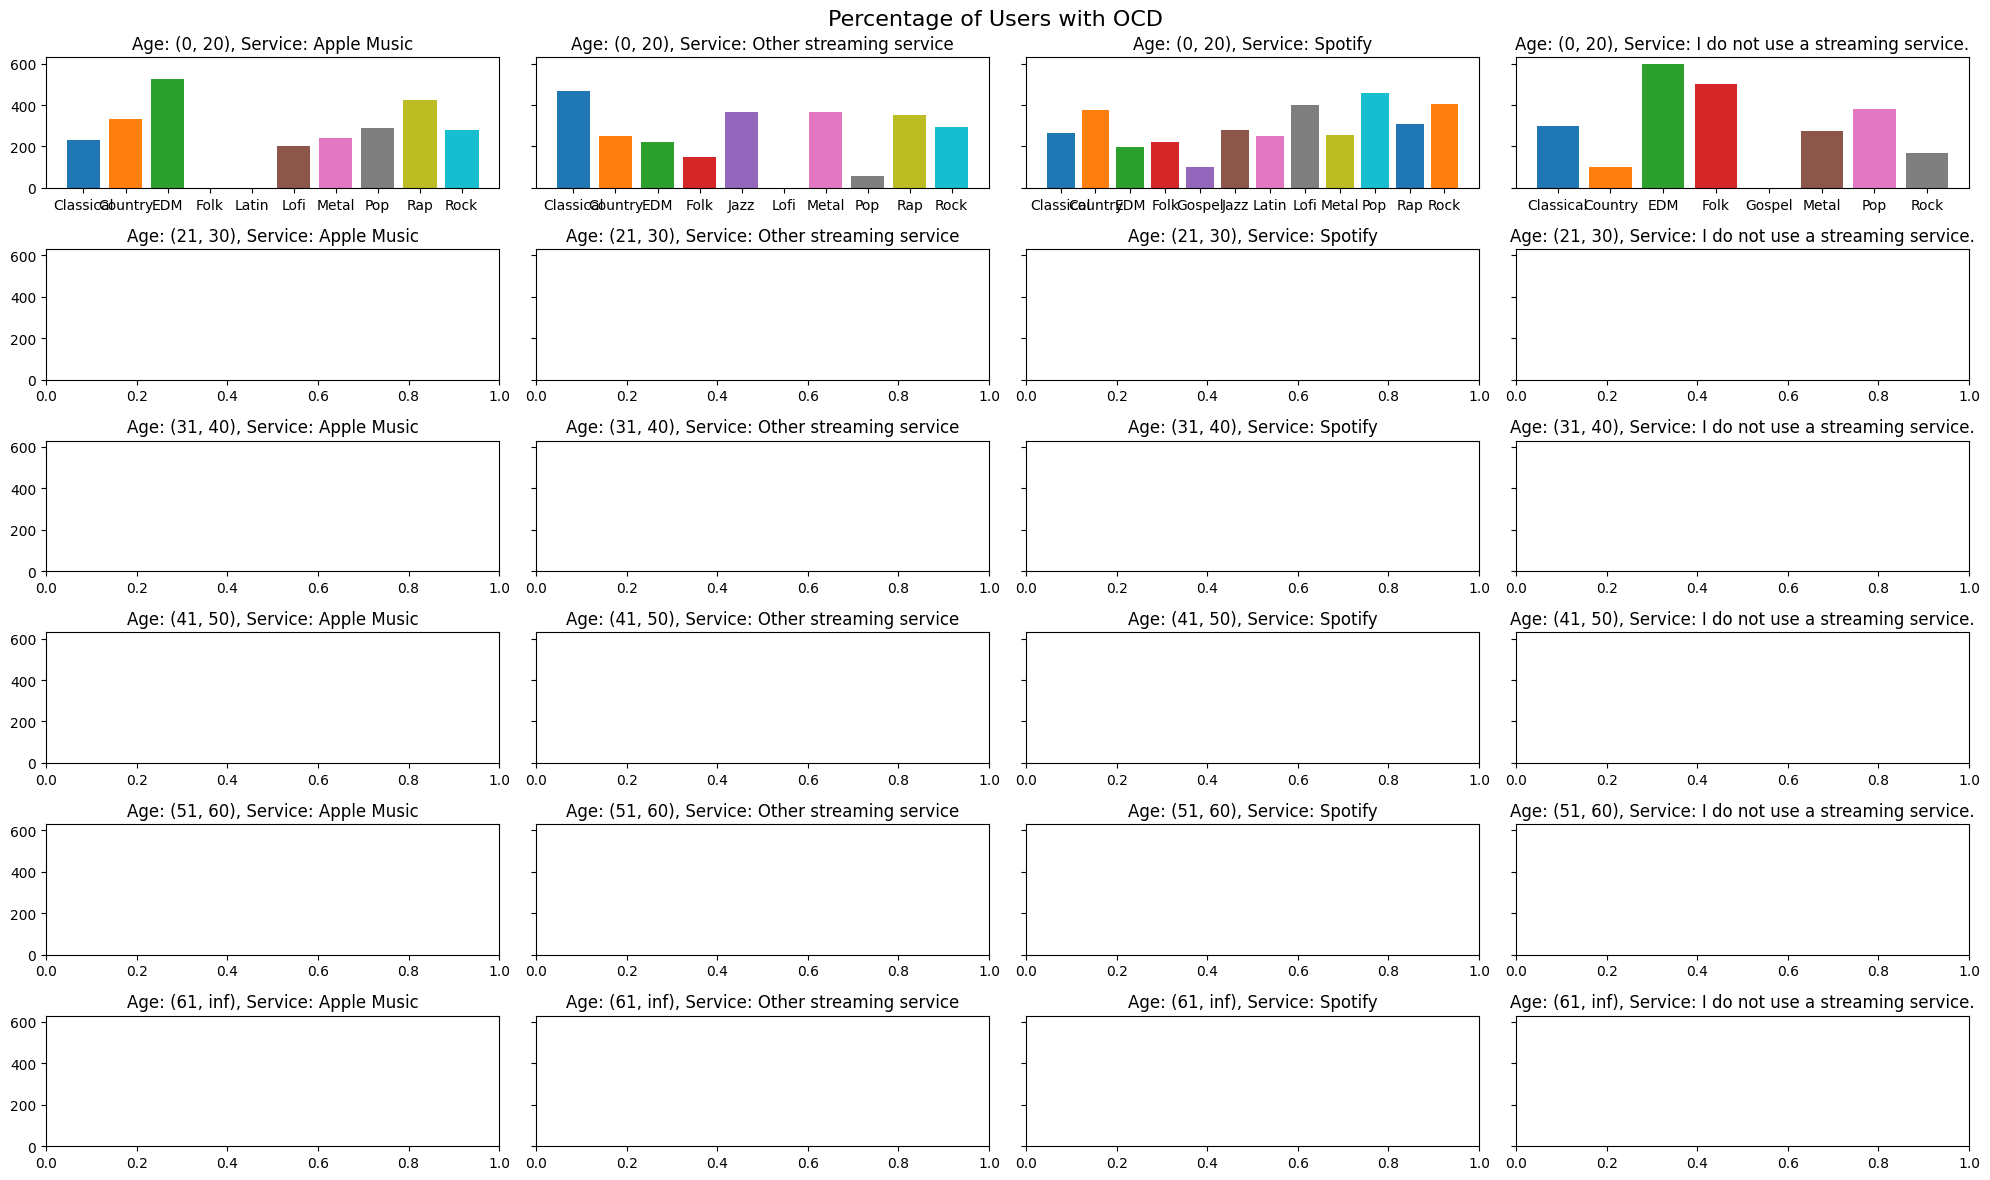

In [258]:
for illness_column in mental_illness_columns:
    fig, axs = plt.subplots(len(age_ranges), len(streaming_services), figsize=(20, 12), sharey=True)
    fig.suptitle(f'Percentage of Users with {illness_column}', fontsize=16)

    for i, age_range in enumerate(age_ranges):
        for j, streaming_service in enumerate(streaming_services):
            age_filter = (grouped_data['Age'] >= age_range[0]) & (grouped_data['Age'] <= age_range[1])
            service_filter = grouped_data['Primary_streaming_service'] == streaming_service
            filtered_data = grouped_data[age_filter & service_filter]

            ax = axs[i, j]
            ax.set_title(f'Age: {age_range}, Service: {streaming_service}')

            for genre in genres:
                genre_filter = filtered_data['Fav_genre'] == genre
                genre_data = filtered_data[genre_filter]

                if not genre_data.empty:
                    total_samples = len(genre_data)
                    percentage = (genre_data[illness_column].sum() / total_samples) * 100
                    ax.bar(genre, percentage)

    plt.tight_layout()
    plt.show()

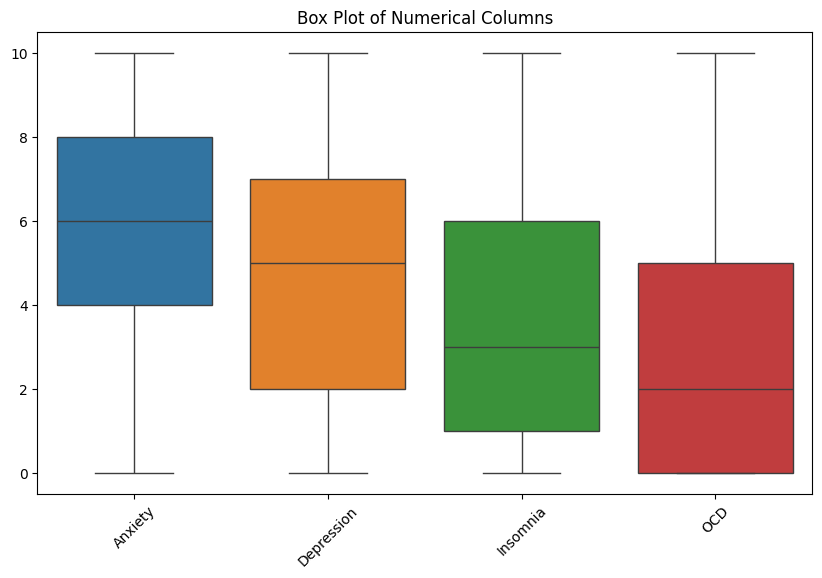

In [259]:
numerical_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Box plot for each numerical column to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

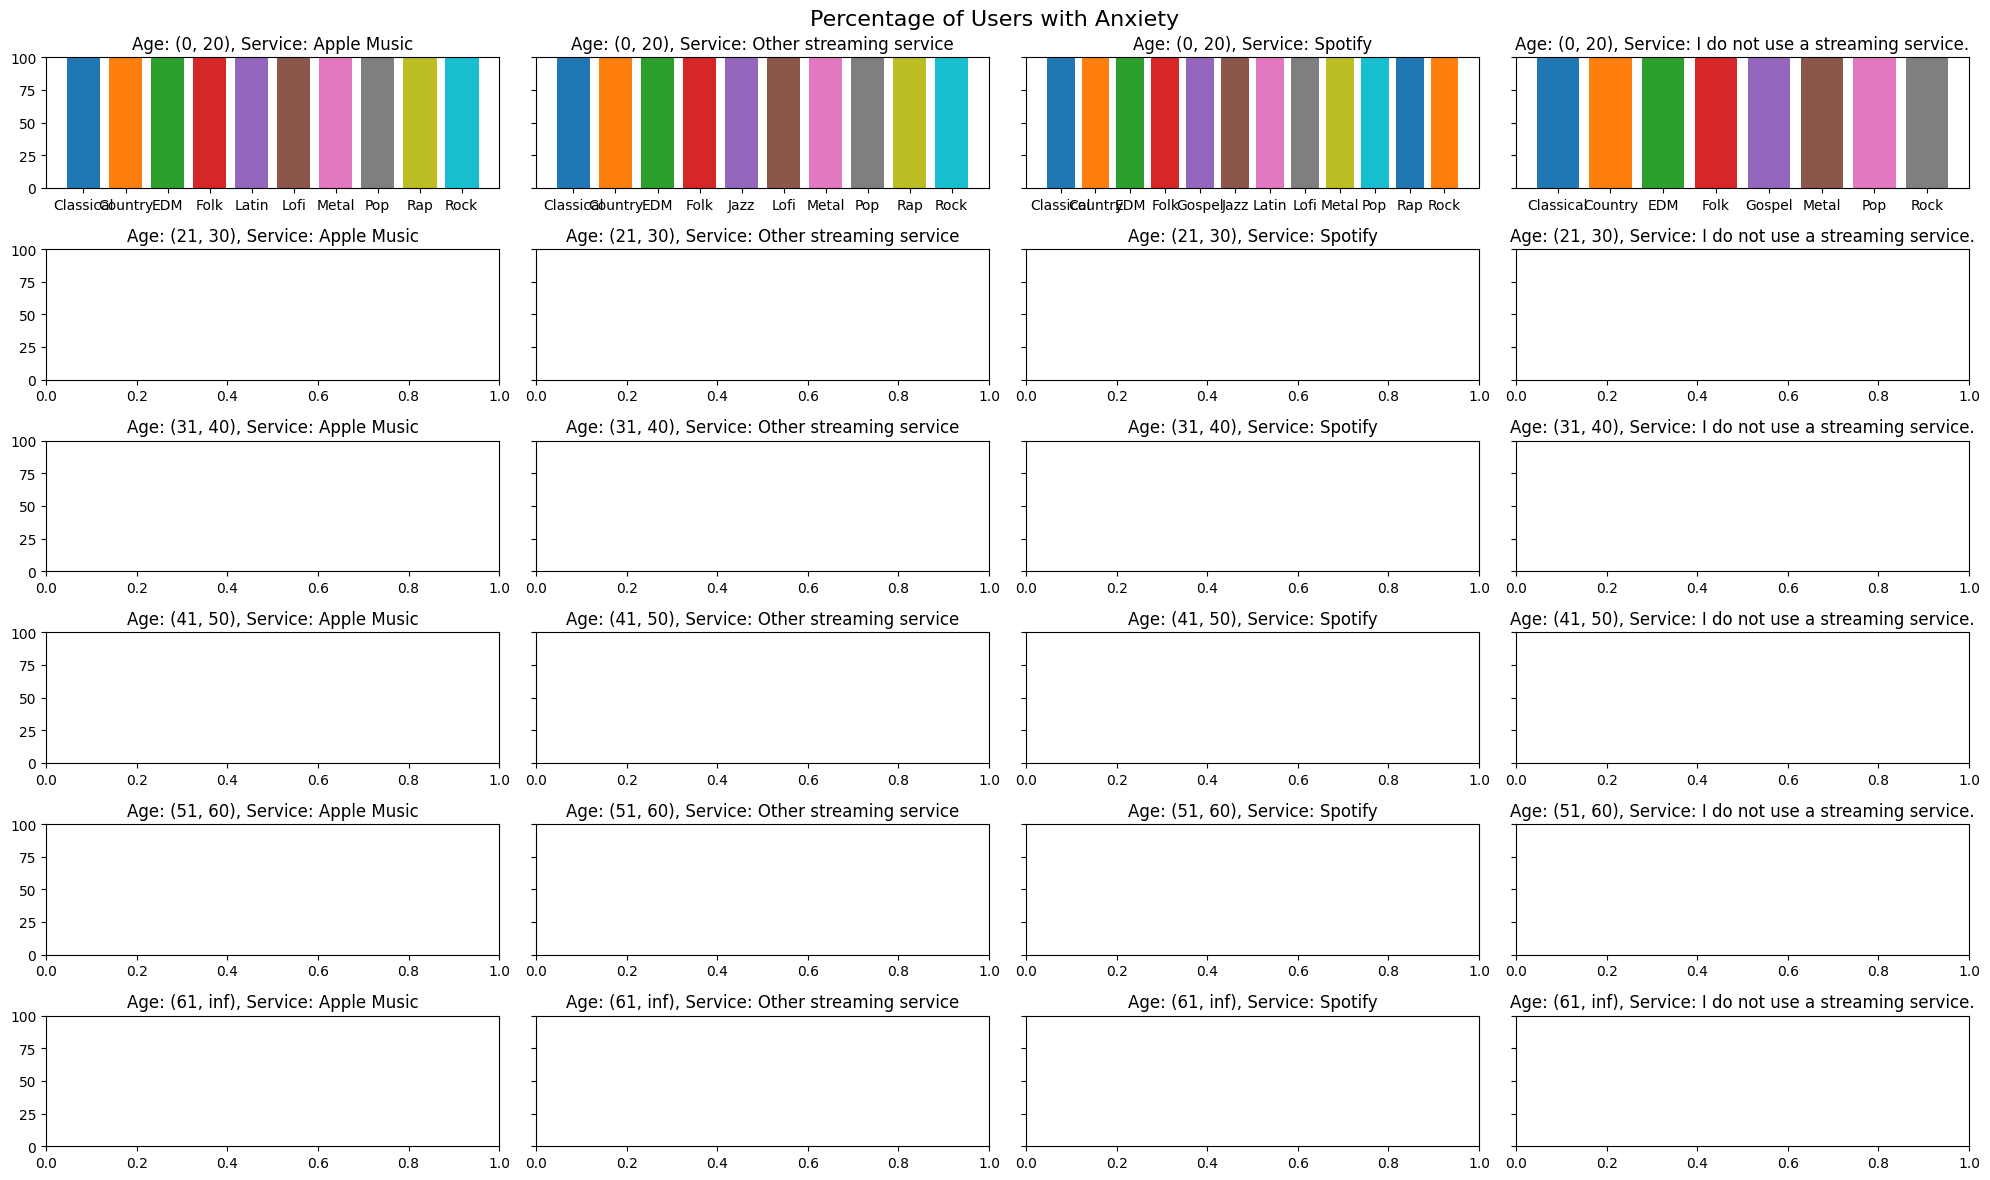

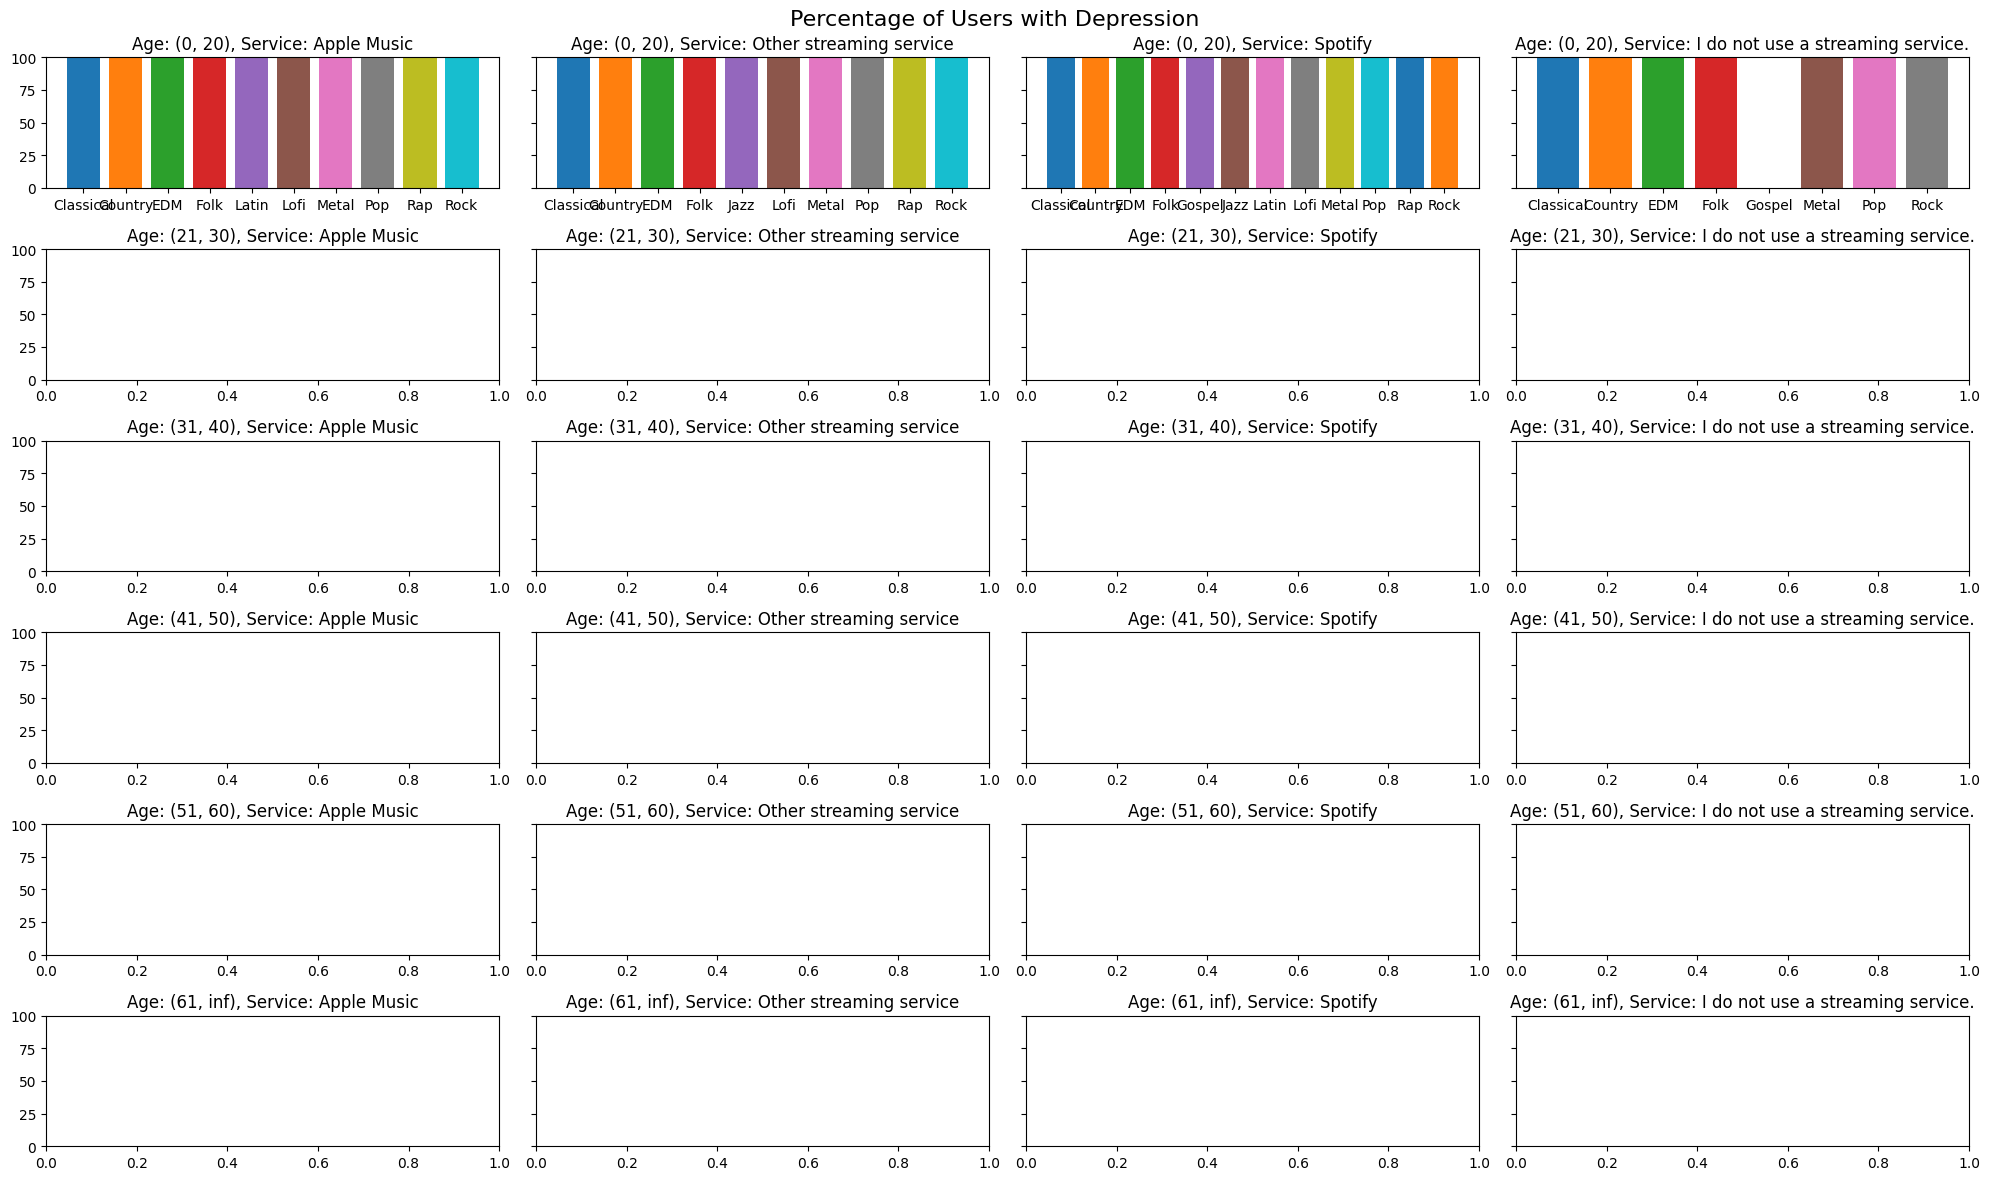

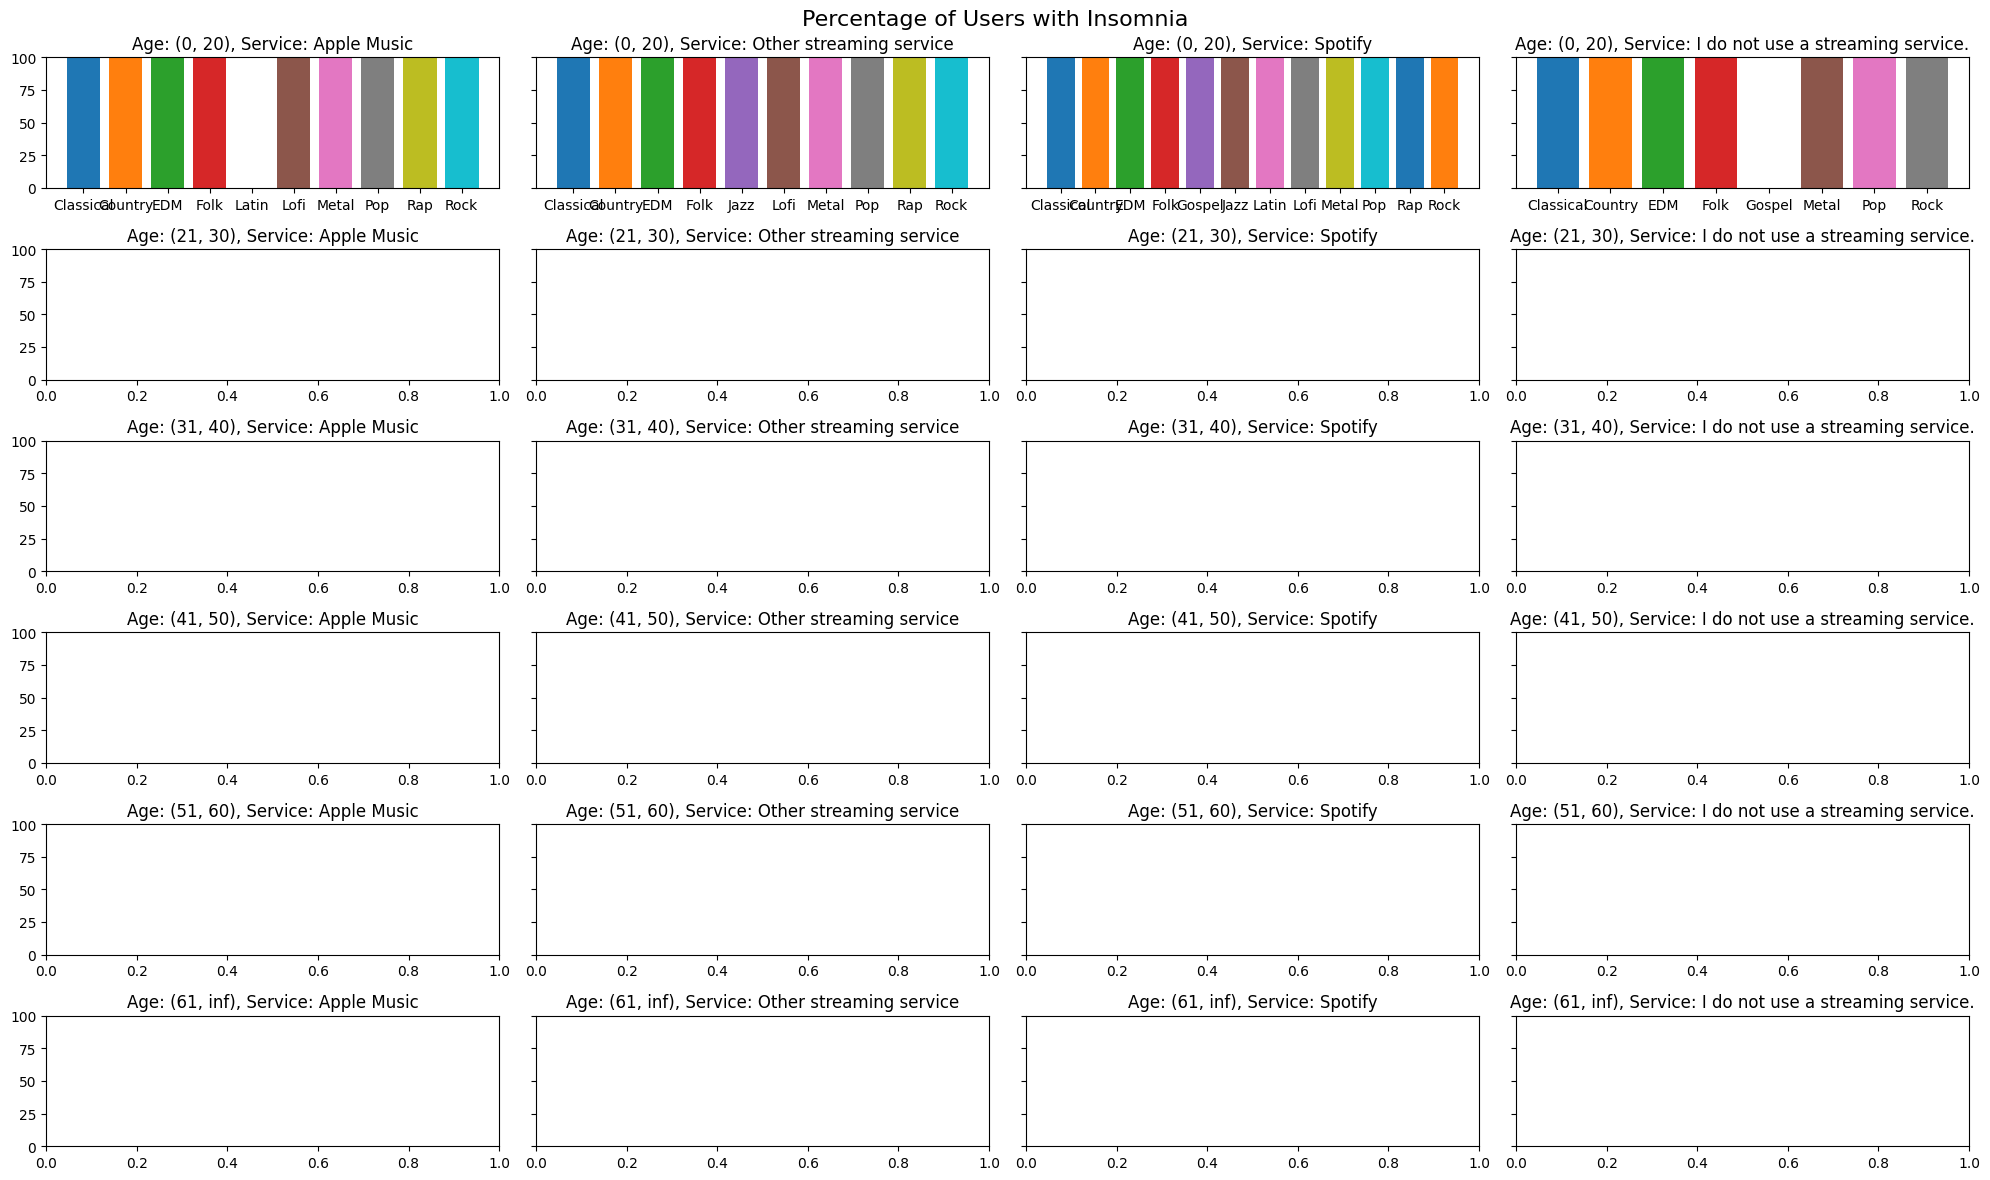

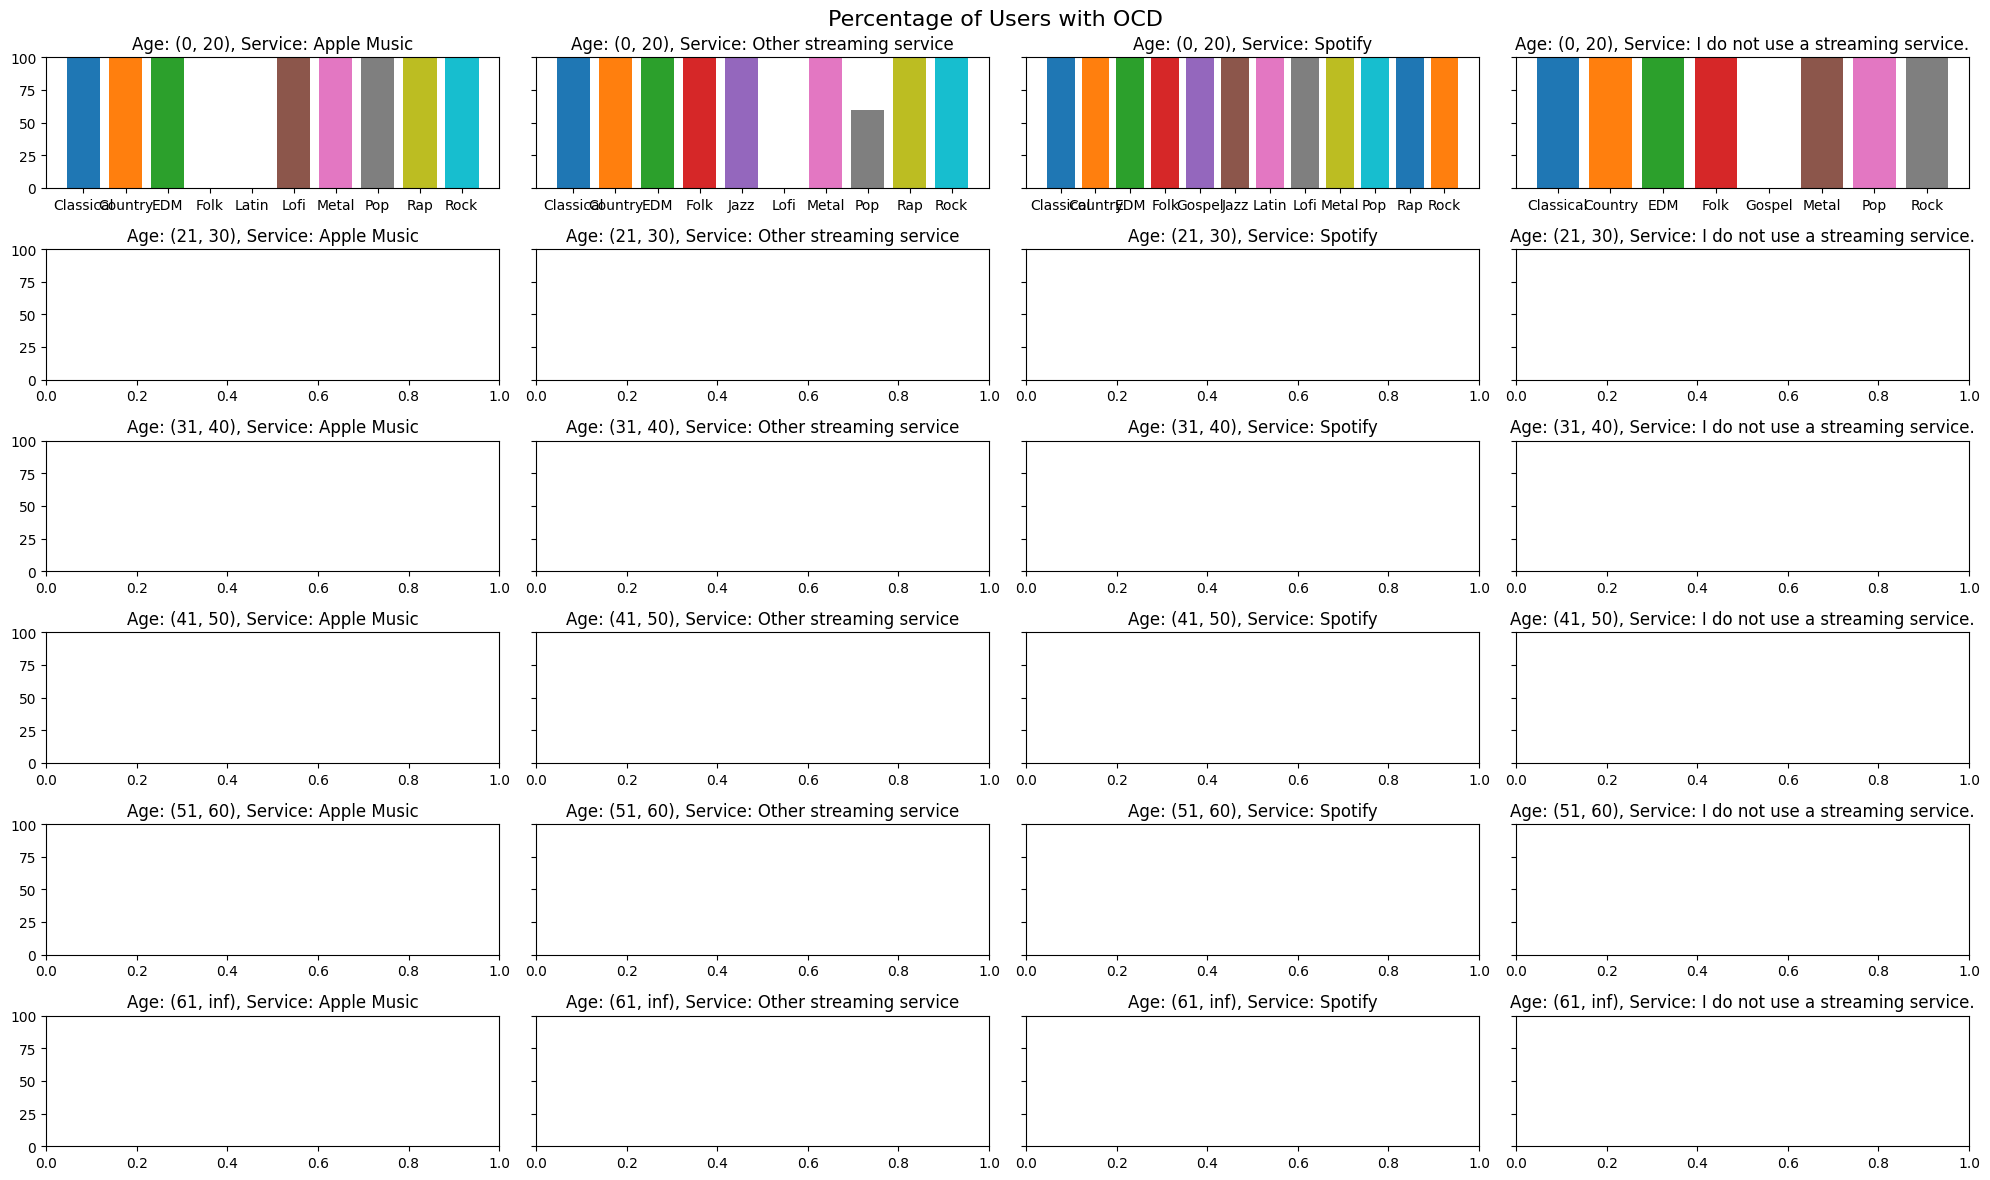

In [260]:
# Calculate percentages and normalize the data
for illness_column in mental_illness_columns:
    fig, axs = plt.subplots(len(age_ranges), len(streaming_services), figsize=(20, 12), sharey=True)
    fig.suptitle(f'Percentage of Users with {illness_column}', fontsize=16)

    for i, age_range in enumerate(age_ranges):
        for j, streaming_service in enumerate(streaming_services):
            age_filter = (grouped_data['Age'] >= age_range[0]) & (grouped_data['Age'] <= age_range[1])
            service_filter = grouped_data['Primary_streaming_service'] == streaming_service
            filtered_data = grouped_data[age_filter & service_filter]

            ax = axs[i, j]
            ax.set_title(f'Age: {age_range}, Service: {streaming_service}')

            for genre in genres:
                genre_filter = filtered_data['Fav_genre'] == genre
                genre_data = filtered_data[genre_filter]

                if not genre_data.empty:
                    # Normalize data by dividing sum of illness column by total number of samples
                    total_samples = len(genre_data)
                    percentage = (genre_data[illness_column].sum() / total_samples) * 100
                    ax.bar(genre, percentage)

            # Set the y-axis limit to 0-100
            ax.set_ylim(0, 100)

    plt.tight_layout()
    plt.show()